<a href="https://colab.research.google.com/github/Chavelanda/Fair-Resampling/blob/main/MAI4CARE_Resampling_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0 - Imports and settings

Importing required libraries

In [ ]:
import os
from pathlib import Path
from google.colab import files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import tensorflow as tf

Setting random state

In [ ]:
random_state = 15

## 1 - Importing the datasets

You can download the 2 datasets by going to:

- dataset1: https://www.kaggle.com/datasets/willianleite/german-credit-card?select=Credit.csv

- dataset2: https://www.kaggle.com/datasets/samuelcortinhas/credit-card-approval-clean-data?resource=download

Then, rename them as 'dataset1' and 'dataset2'.

Finally, upload them on colab using the following cell.

In [ ]:
uploaded = files.upload()

Saving dataset1.csv to dataset1.csv
Saving dataset2.csv to dataset2.csv


In [ ]:
df1 = pd.read_csv("dataset1.csv", index_col=0)
df2 = pd.read_csv('dataset2.csv')

## 2 - Exploring the 2 datasets

### Exploring dataset 1

We start by having a broad look at the dataset and at its description

In [ ]:
df1

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,sex,residence,age,housing,cards,liable,tele,foreign
1,0,<DM0,6,terrible,goods/repair,1169,DM0-100,7+years,4,male,4,67,own,2,1,yes,foreign
2,1,DM0-200,48,poor,goods/repair,5951,DM0-100,1-7years,2,female,2,22,own,1,1,no,foreign
3,0,NoAccount,12,terrible,edu,2096,DM0-100,1-7years,2,male,3,49,own,1,2,no,foreign
4,0,<DM0,42,poor,goods/repair,7882,DM0-100,1-7years,2,male,4,45,forfree,1,2,no,foreign
5,1,<DM0,24,poor,newcar,4870,DM0-100,1-7years,3,male,4,53,forfree,2,2,no,foreign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0,NoAccount,12,poor,goods/repair,1736,DM0-100,1-7years,3,female,4,31,own,1,1,no,foreign
997,0,<DM0,30,poor,usedcar,3857,DM0-100,1-7years,4,male,4,40,own,1,1,yes,foreign
998,0,NoAccount,12,poor,goods/repair,804,DM0-100,7+years,4,male,4,38,own,1,1,no,foreign
999,1,<DM0,45,poor,goods/repair,1845,DM0-100,1-7years,4,male,4,23,forfree,1,1,yes,foreign


In [ ]:
df1.describe()

,Default,duration,amount,installment,residence,age,cards,liable
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


There are no duplicates as shown below.




In [ ]:
df1.duplicated().value_counts()

False    1000
dtype: int64

Let us examine a bit more in depth the features of the dataset.

In [ ]:
df1.nunique()

Default              2
checkingstatus1      4
duration            33
history              3
purpose              5
amount             921
savings              3
employ               4
installment          4
sex                  2
residence            4
age                 53
housing              3
cards                4
liable               2
tele                 2
foreign              2
dtype: int64

We can check that there are not missing values in the dataframe and we look at the dtype of each feature.

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Default          1000 non-null   int64 
 1   checkingstatus1  1000 non-null   object
 2   duration         1000 non-null   int64 
 3   history          1000 non-null   object
 4   purpose          1000 non-null   object
 5   amount           1000 non-null   int64 
 6   savings          1000 non-null   object
 7   employ           1000 non-null   object
 8   installment      1000 non-null   int64 
 9   sex              1000 non-null   object
 10  residence        1000 non-null   int64 
 11  age              1000 non-null   int64 
 12  housing          1000 non-null   object
 13  cards            1000 non-null   int64 
 14  liable           1000 non-null   int64 
 15  tele             1000 non-null   object
 16  foreign          1000 non-null   object
dtypes: int64(8), object(9)
memory usa

We also have a peek at the possible values for each feature

In [ ]:
for col in df1:
    print(col, df1[col].unique())

Default [0 1]
checkingstatus1 ['<DM0' 'DM0-200' 'NoAccount' 'DM200+']
duration [ 6 48 12 42 24 36 30 15  9 10  7 60 18 45 11 27  8 54 20 14 33 21 16  4
 47 13 22 39 28  5 26 72 40]
history ['terrible' 'poor' 'good']
purpose ['goods/repair' 'edu' 'newcar' 'usedcar' 'biz']
amount [ 1169  5951  2096  7882  4870  9055  2835  6948  3059  5234  1295  4308
  1567  1199  1403  1282  2424  8072 12579  3430  2134  2647  2241  1804
  2069  1374   426   409  2415  6836  1913  4020  5866  1264  1474  4746
  6110  2100  1225   458  2333  1158  6204  6187  6143  1393  2299  1352
  7228  2073  5965  1262  3378  2225   783  6468  9566  1961  6229  1391
  1537  1953 14421  3181  5190  2171  1007  1819  2394  8133   730  1164
  5954  1977  1526  3965  4771  9436  3832  5943  1213  1568  1755  2315
  1412 12612  2249  1108   618  1409   797  3617  1318 15945  2012  2622
  2337  7057  1469  2323   932  1919  2445 11938  6458  6078  7721  1410
  1449   392  6260  7855  1680  3578  7174  2132  4281  2366  18

Let's have a look at the correlation between the features.

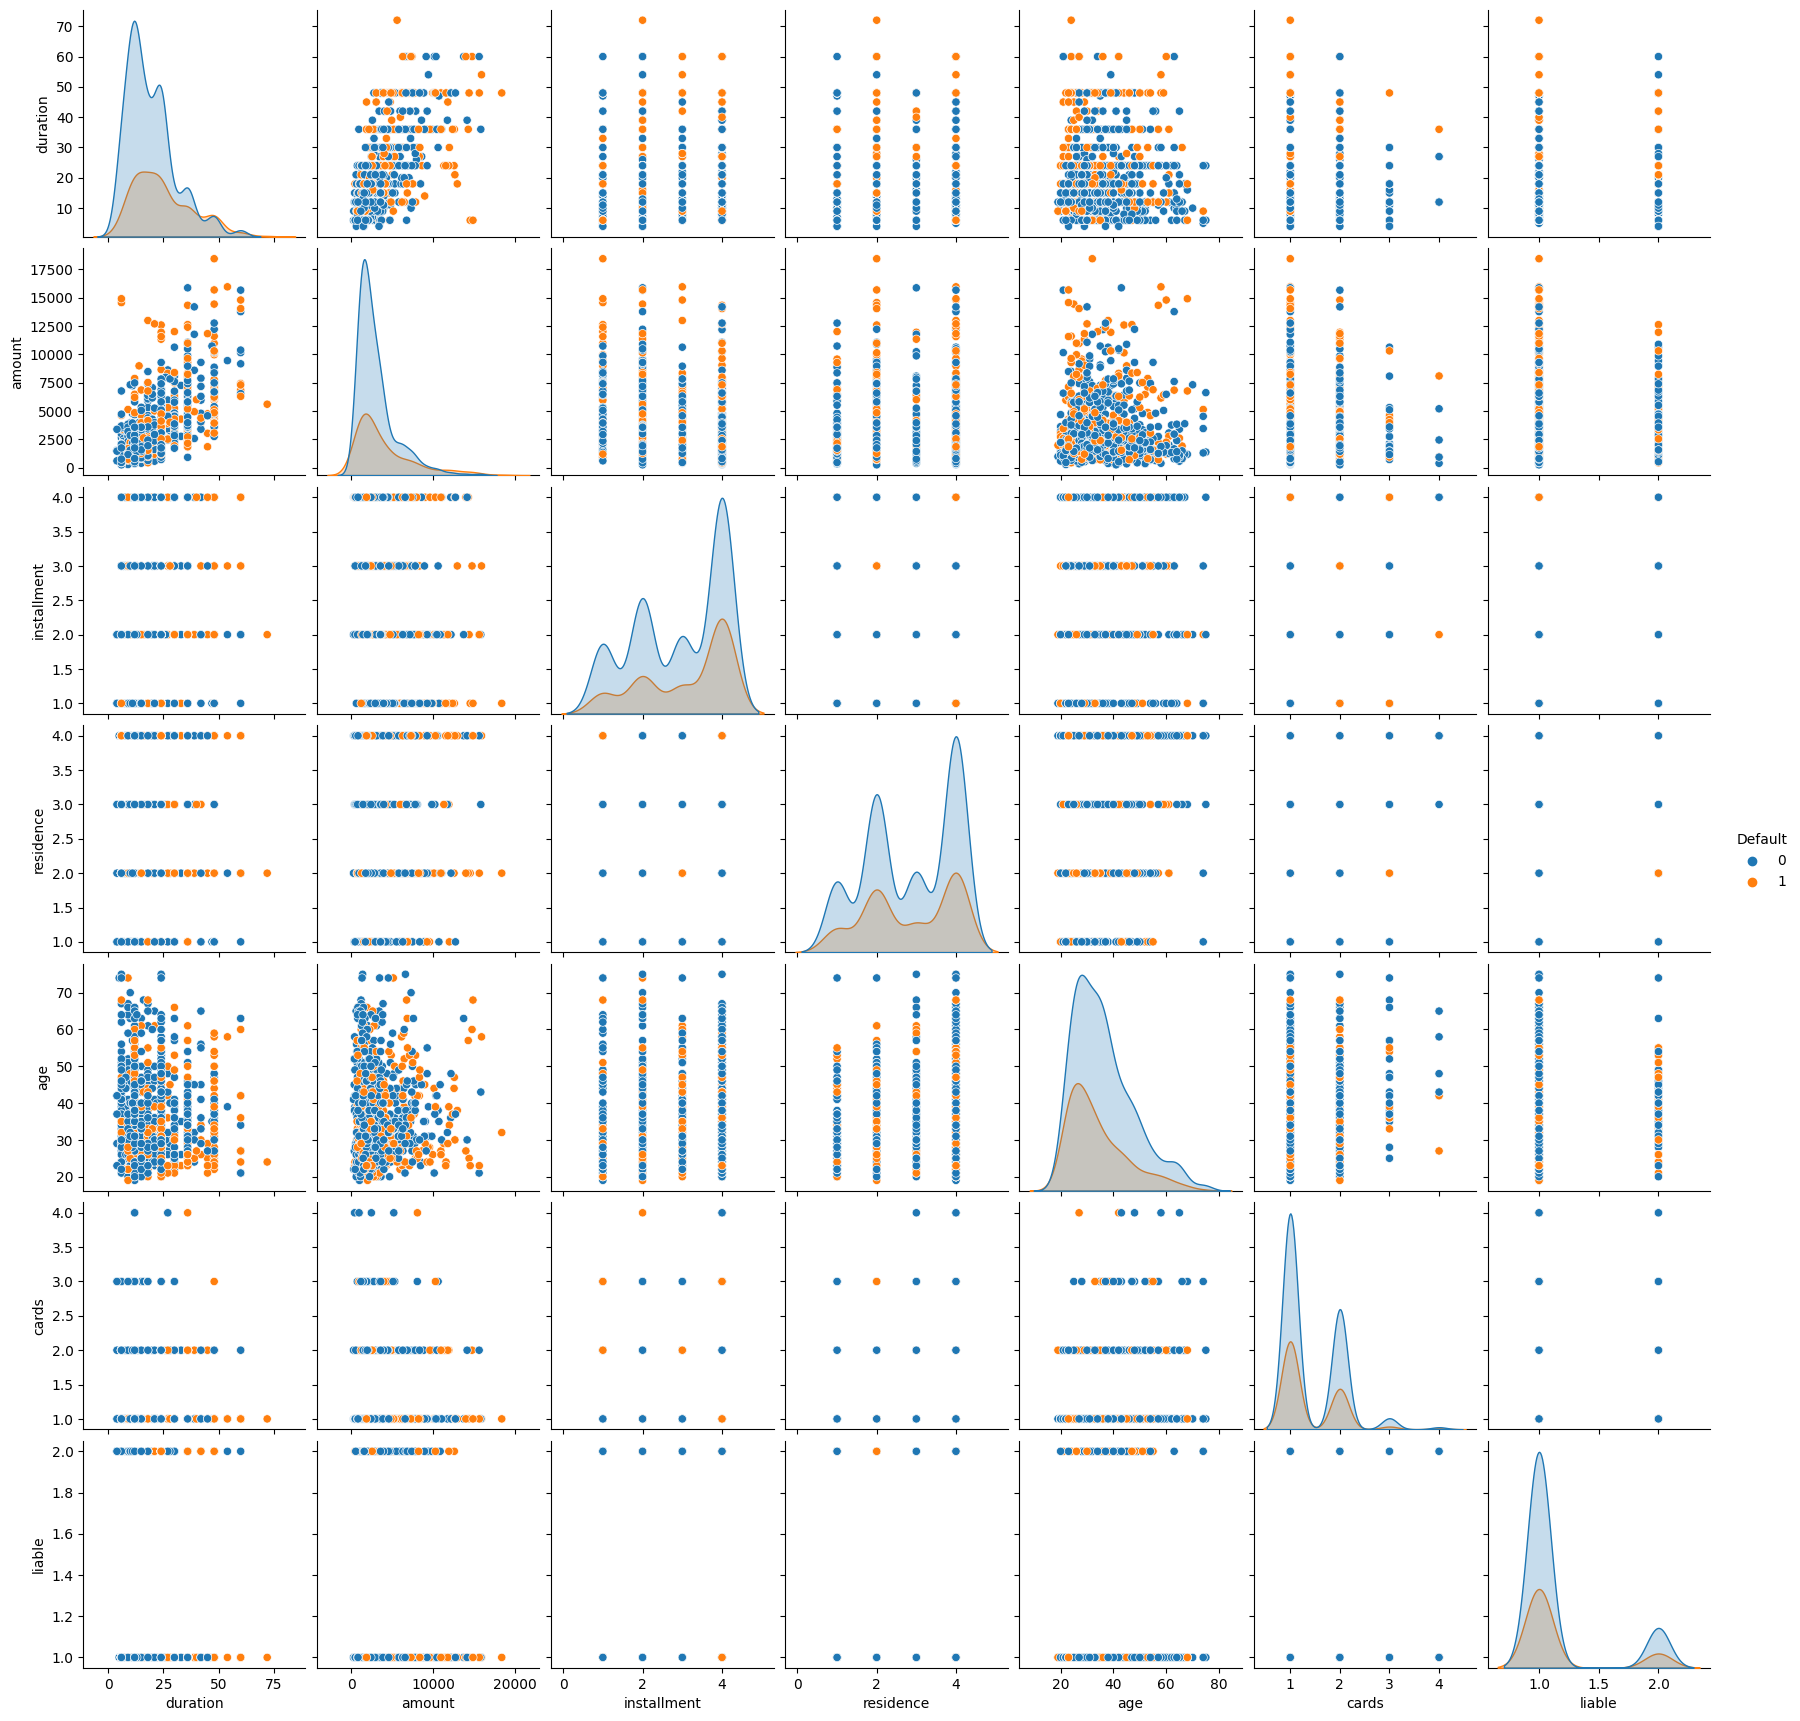

In [ ]:
sns.pairplot(df1, hue='Default')
plt.show()

Default column represents if a credit card is approved:

0 = no

1 = yes

Let us see what is the basic imbalance rate between approved and non approved credits.

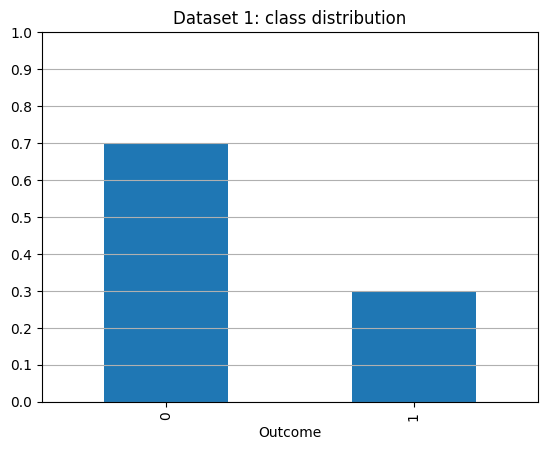

In [ ]:
ax = df1['Default'].value_counts(normalize=True).plot(kind='bar', 
                                                      title='Dataset 1: class distribution', 
                                                      xlabel='Outcome', 
                                                      yticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.grid(axis='y')

We can now proceed by examining more in depth the protected attributes

#### Gender attribute

We print the n. of samples for each gender

In [ ]:
df1_female = df1[df1['sex']=='female']
df1_male = df1[df1['sex']=='male']

print(f"n. of elems of female dataset: \t{len(df1_female)}\nn. of elems of male dataset: \t{len(df1_male)}")

n. of elems of female dataset: 	310
n. of elems of male dataset: 	690


Now, for both genders, we show the probability of having the credit card approved.




For females:

0    201
1    109
Name: Default, dtype: int64


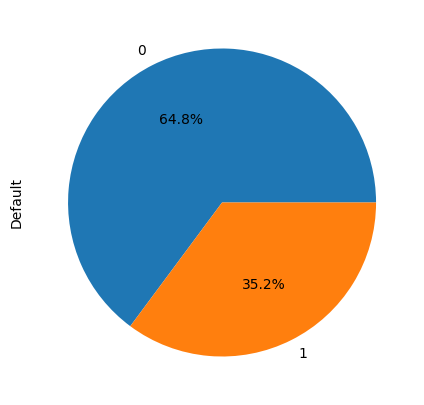

In [ ]:
print(df1_female['Default'].value_counts())
df1_female['Default'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(5,5))
plt.show()

For males:

0    499
1    191
Name: Default, dtype: int64


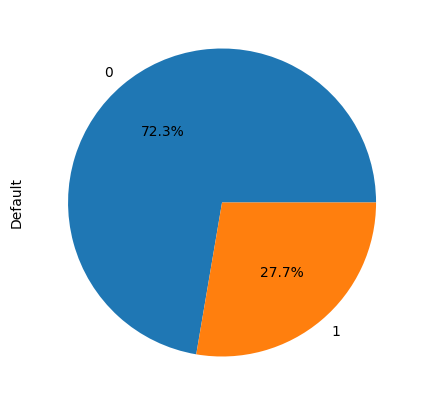

In [ ]:
print(df1_male['Default'].value_counts())
df1_male['Default'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(5,5))
plt.show()

It looks like females have a slightly higher chance of getting their credit card approved: 35.2% vs 27.7%.

#### Foreign attribute

We print the n. of samples for each protected group

In [ ]:
df1.groupby('foreign').count()

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,sex,residence,age,housing,cards,liable,tele
foreign,,,,,,,,,,,,,,,,
foreign,963,963,963,963,963,963,963,963,963,963,963,963,963,963,963,963
german,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37


We show the probability for each group to have the credit card approved

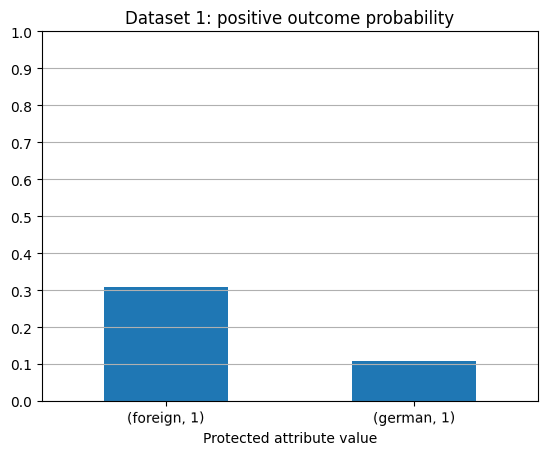

In [ ]:
ax = df1.groupby('foreign')['Default'].value_counts(normalize=True).loc[[('foreign', 1), ('german', 1)]].plot(kind='bar',
                                                                                                         title='Dataset 1: positive outcome probability',
                                                                                                         xlabel='Protected attribute value',
                                                                                                         rot=0.5,
                                                                                                         yticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

ax.grid(axis='y')

We can observe that the imbalance rate is different based on the foreign attribute. More specifically, we have that when the customer is german, he has a lower probability of having a credit given w.r.t. the whole dataset.

### Exploring dataset 2

Same as before, we look at the dataset and at its description

In [ ]:
df2

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0


In [ ]:
df2.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


There are no duplicates as shown below.




In [ ]:
df2.duplicated().value_counts()

False    690
dtype: int64

We continue by examining the features of the dataset

In [ ]:
df2.nunique()

Gender              2
Age               350
Debt              215
Married             2
BankCustomer        2
Industry           14
Ethnicity           5
YearsEmployed     132
PriorDefault        2
Employed            2
CreditScore        23
DriversLicense      2
Citizen             3
ZipCode           170
Income            240
Approved            2
dtype: int64

We check for missing values and observe the type of the features

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


As before, we look at the possible values for all the features

In [ ]:
for col in df2:
    print(col, df2[col].unique())

Gender [1 0]
Age [30.83 58.67 24.5  27.83 20.17 32.08 33.17 22.92 54.42 42.5  22.08 29.92
 38.25 48.08 45.83 36.67 28.25 23.25 21.83 19.17 25.   47.75 27.42 41.17
 15.83 47.   56.58 57.42 42.08 29.25 42.   49.5  36.75 22.58 27.25 23.
 27.75 54.58 34.17 28.92 29.67 39.58 56.42 54.33 41.   31.92 41.5  23.92
 25.75 26.   37.42 34.92 34.25 23.33 23.17 44.33 35.17 43.25 56.75 31.67
 23.42 20.42 26.67 36.   25.5  19.42 32.33 34.83 38.58 44.25 44.83 20.67
 34.08 21.67 21.5  49.58 27.67 39.83 28.46 37.17 25.67 34.   49.   62.5
 31.42 52.33 28.75 28.58 22.5  28.5  37.5  35.25 18.67 54.83 40.92 19.75
 29.17 24.58 33.75 25.42 37.75 52.5  57.83 20.75 39.92 24.75 44.17 23.5
 47.67 22.75 34.42 28.42 67.75 47.42 36.25 32.67 48.58 33.58 18.83 26.92
 31.25 56.5  43.   22.33 32.83 40.33 30.5  52.83 46.67 58.33 37.33 23.08
 32.75 68.67 28.   44.   25.08 32.   60.58 40.83 19.33 41.33 56.   49.83
 22.67 27.   26.08 18.42 21.25 57.08 22.42 48.75 40.   40.58 28.67 33.08
 21.33 41.75 34.5  48.17 27.58 24.08 2

Finally, we plot the correlation between the features

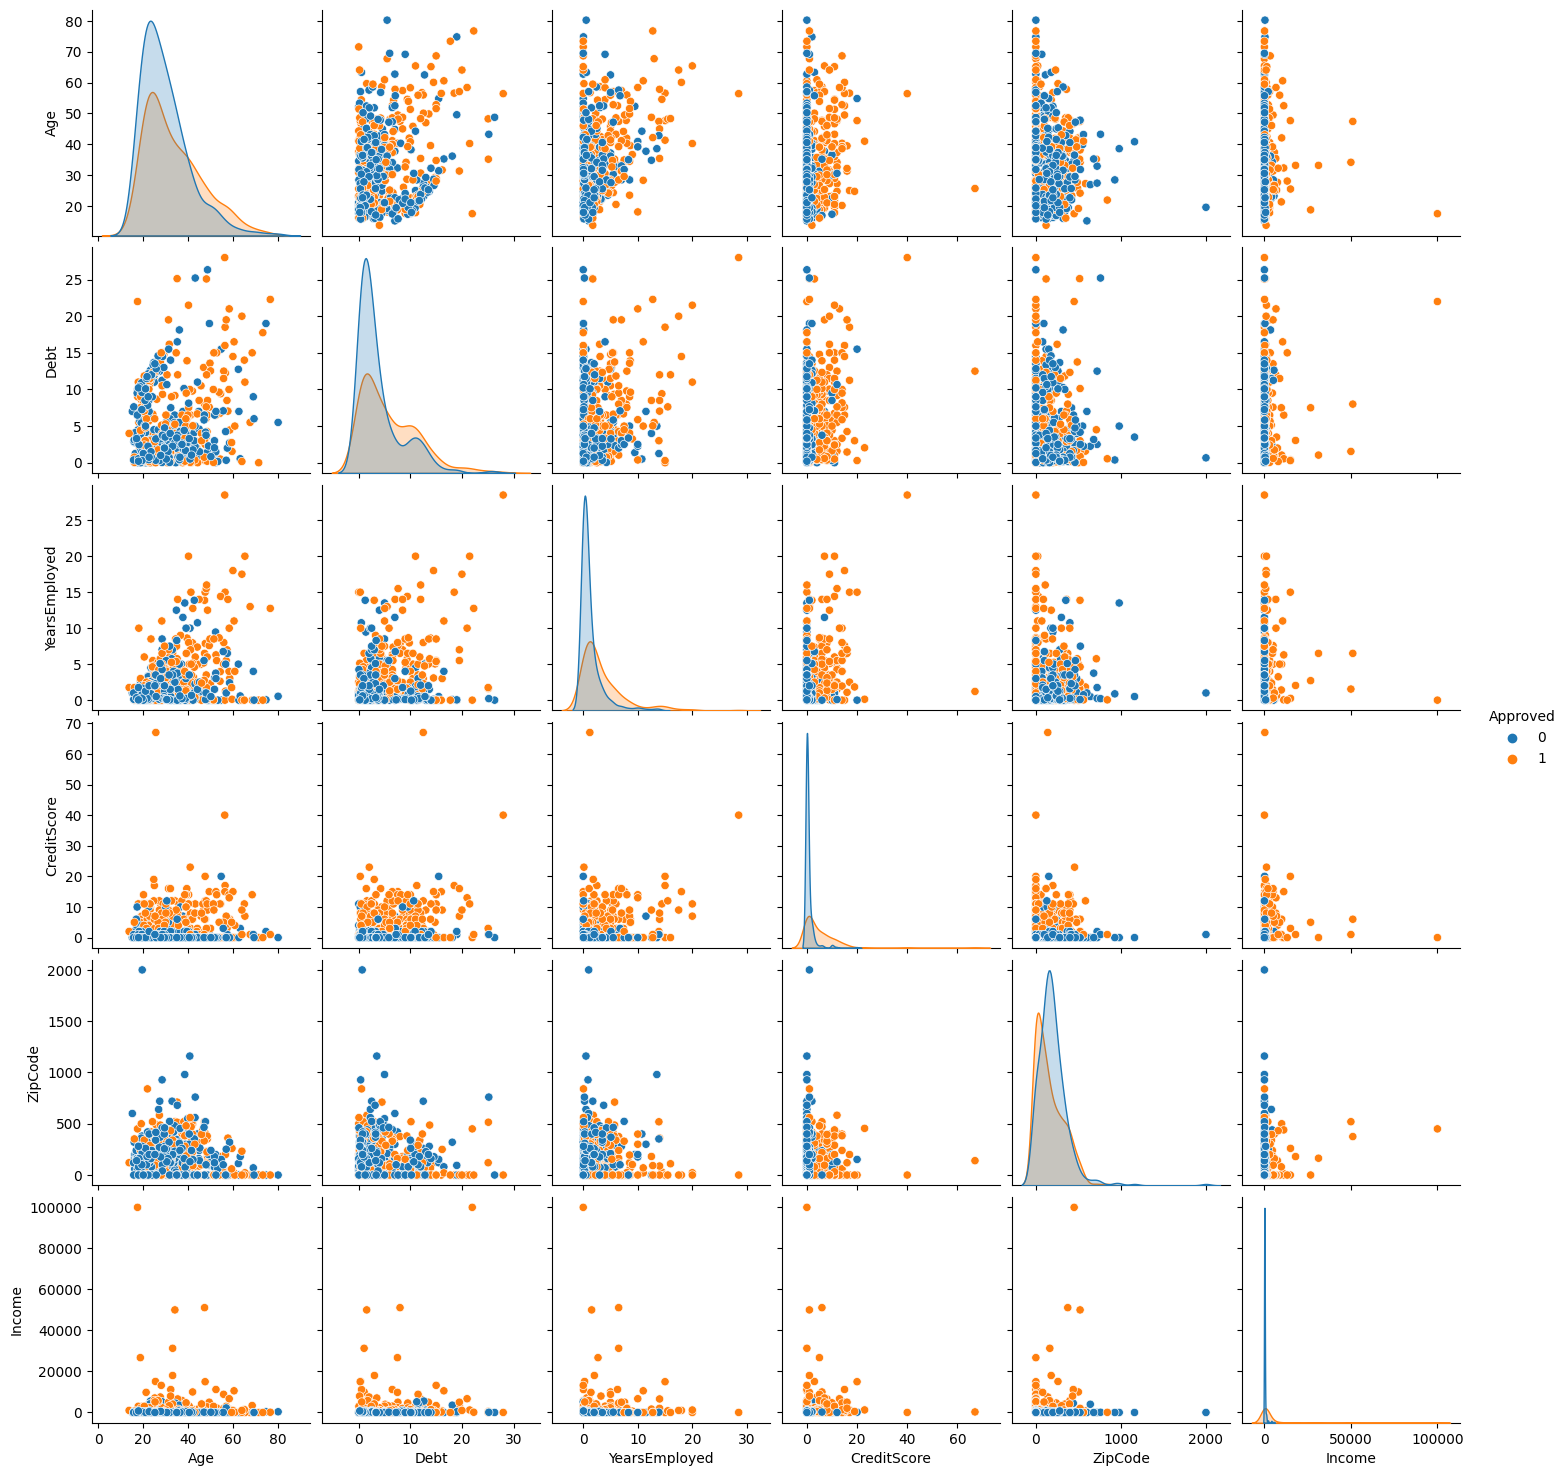

In [ ]:
sns.pairplot(df2[['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'ZipCode', 'Income', 'Approved']], hue='Approved')
plt.show()

Approved column represents if a credit card is approved:

0 = no

1 = yes

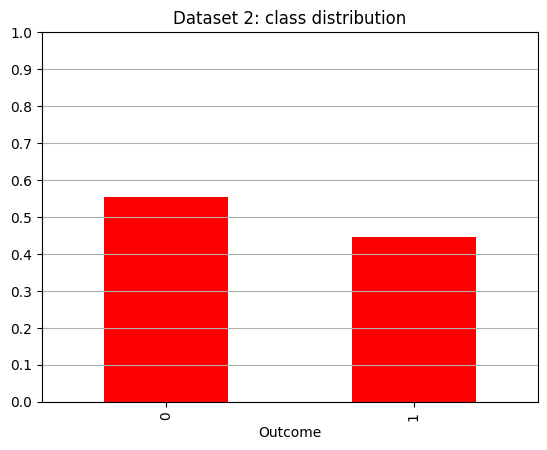

In [ ]:
ax = df2['Approved'].value_counts(normalize=True).plot(kind='bar',
                                                  title='Dataset 2: class distribution', 
                                                  xlabel='Outcome',
                                                  color='red',
                                                  yticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

ax.grid(axis='y')

#### Gender attribute

We print the n. of samples for each gender

In [ ]:
df2_female = df2[df2['Gender']==0]
df2_male = df2[df2['Gender']==1]

print(f"n. of elems of female dataset: \t{len(df2_female)}\nn. of elems of male dataset: \t{len(df2_male)}")

n. of elems of female dataset: 	210
n. of elems of male dataset: 	480


Now, for both genders, we show the probability of having the credit card approved.


For females: 

0    112
1     98
Name: Approved, dtype: int64


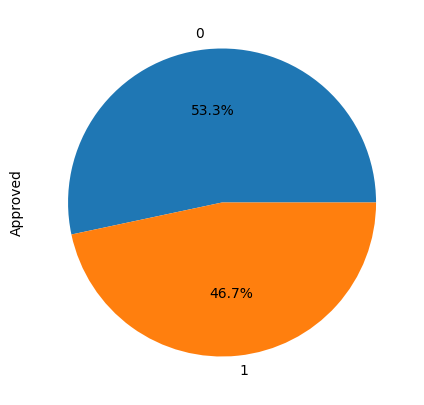

In [ ]:
print(df2_female['Approved'].value_counts())
df2_female['Approved'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(5,5))
plt.show()

For males:

0    271
1    209
Name: Approved, dtype: int64


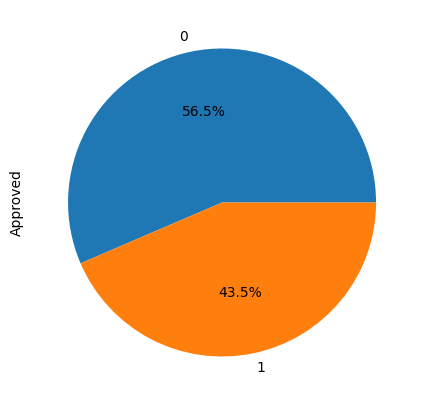

In [ ]:
print(df2_male['Approved'].value_counts())
df2_male['Approved'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(5,5))
plt.show()

It looks like males and females have a similar chance of getting credit and for both genders the probability of getting a credit is very close to the one considering the whole datasets.

#### Ethnicity attribute

In [ ]:
df2.groupby('Ethnicity').count()

,Gender,Age,Debt,Married,BankCustomer,Industry,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
Ethnicity,,,,,,,,,,,,,,,
Asian,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59
Black,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138
Latino,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57
Other,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
White,408,408,408,408,408,408,408,408,408,408,408,408,408,408,408


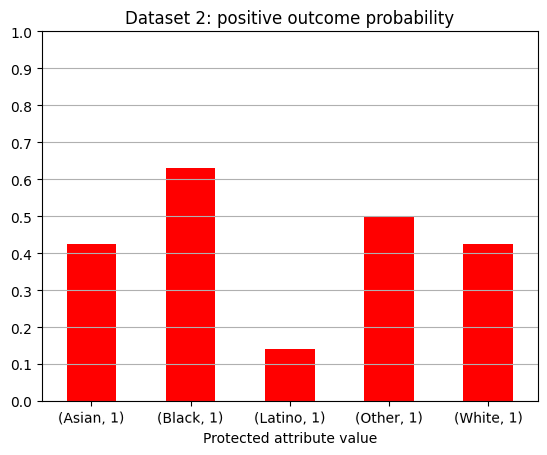

In [ ]:
ax = df2.groupby('Ethnicity')['Approved'].value_counts(normalize=True).loc[[('Asian', 1), ('Black', 1), ('Latino', 1), ('Other', 1), ('White', 1)]].plot(kind='bar', 
                                                                                                                                                    title='Dataset 2: positive outcome probability',
                                                                                                                                                    xlabel='Protected attribute value',
                                                                                                                                                    rot=0.5,
                                                                                                                                                    color='red',
                                                                                                                                                    yticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

ax.grid(axis='y')

Here we can observe that depending on the ethnicity attribute, the probability of receiving credit varies a lot. 

## 3 - Pre-processing

Let's start by defining which features that need preprocessing are categorical and which are numerical for each of the two datasets.

In [ ]:
numerical_df1 = ['duration', 'amount', 'installment', 'residence', 'age', 'cards', 'liable']
categorical_df1 = ['checkingstatus1','history','purpose','savings','employ','sex','housing','tele','foreign']

# How do we define zip code? Doesn't make sense as numerical but becomes a huge one hot encoding
numerical_df2 = ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']
categorical_df2 = ['Industry', 'Ethnicity', 'Citizen']


### Categorical data

We can encode categorical features with one hot encoding

In [ ]:
prep_df1 = pd.get_dummies(df1, columns=categorical_df1)
prep_df2 = pd.get_dummies(df2, columns=categorical_df2)

prep_df2.head()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,...,Industry_Transport,Industry_Utilities,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Latino,Ethnicity_Other,Ethnicity_White,Citizen_ByBirth,Citizen_ByOtherMeans,Citizen_Temporary
0,1,30.83,0.000,1,1,1.25,1,1,1,0,...,0,0,0,0,0,0,1,1,0,0
1,0,58.67,4.460,1,1,3.04,1,1,6,0,...,0,0,0,1,0,0,0,1,0,0
2,0,24.50,0.500,1,1,1.50,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,1,27.83,1.540,1,1,3.75,1,1,5,1,...,0,0,0,0,0,0,1,1,0,0
4,1,20.17,5.625,1,1,1.71,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


Categorical data that had only two categories (tele, sex) can be represented just by one column. We get rid of the other one. We keep the category foreign_german because it is useful for coding purposes. 

In [ ]:
prep_df1 = prep_df1.drop(columns=['sex_male', 'tele_no'])
prep_df1

,Default,duration,amount,installment,residence,age,cards,liable,checkingstatus1_<DM0,checkingstatus1_DM0-200,...,employ_1-7years,employ_7+years,employ_unemployed,sex_female,housing_forfree,housing_own,housing_rent,tele_yes,foreign_foreign,foreign_german
1,0,6,1169,4,4,67,2,1,1,0,...,0,1,0,0,0,1,0,1,1,0
2,1,48,5951,2,2,22,1,1,0,1,...,1,0,0,1,0,1,0,0,1,0
3,0,12,2096,2,3,49,1,2,0,0,...,1,0,0,0,0,1,0,0,1,0
4,0,42,7882,2,4,45,1,2,1,0,...,1,0,0,0,1,0,0,0,1,0
5,1,24,4870,3,4,53,2,2,1,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0,12,1736,3,4,31,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
997,0,30,3857,4,4,40,1,1,1,0,...,1,0,0,0,0,1,0,1,1,0
998,0,12,804,4,4,38,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0
999,1,45,1845,4,4,23,1,1,1,0,...,1,0,0,0,1,0,0,1,1,0


### Numerical data

In [ ]:
prep_df1[numerical_df1].describe()

,duration,amount,installment,residence,age,cards,liable
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [ ]:
prep_df2[numerical_df2].describe()

,Age,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.000000,690.00000,690.000000
mean,31.514116,4.758725,2.223406,2.40000,1017.385507
std,11.860245,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


We can observe that in both datasets the mean values between the different features differ a lot. In order to have them share a common scale, we proceed normalizing them.

In [ ]:
prep_df1[numerical_df1] = (prep_df1[numerical_df1] - prep_df1[numerical_df1].min())/(prep_df1[numerical_df1].max() - prep_df1[numerical_df1].min())
prep_df2[numerical_df2] = (prep_df2[numerical_df2] - prep_df2[numerical_df2].min())/(prep_df2[numerical_df2].max() - prep_df2[numerical_df2].min())

prep_df2.head()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,...,Industry_Transport,Industry_Utilities,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Latino,Ethnicity_Other,Ethnicity_White,Citizen_ByBirth,Citizen_ByOtherMeans,Citizen_Temporary
0,1,0.256842,0.000000,1,1,0.043860,1,1,0.014925,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0.675489,0.159286,1,1,0.106667,1,1,0.089552,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0.161654,0.017857,1,1,0.052632,1,0,0.000000,0,...,0,0,0,1,0,0,0,1,0,0
3,1,0.211729,0.055000,1,1,0.131579,1,1,0.074627,1,...,0,0,0,0,0,0,1,1,0,0
4,1,0.096541,0.200893,1,1,0.060000,1,0,0.000000,0,...,0,0,0,0,0,0,1,0,1,0


We can now observe that all the numerical data range between 0 and 1.

In [ ]:
prep_df1[numerical_df1].describe()

,duration,amount,installment,residence,age,cards,liable
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.248574,0.166241,0.657667,0.615000,0.295464,0.135667,0.155000
std,0.177336,0.155317,0.372905,0.367906,0.203133,0.192551,0.362086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.117647,0.061379,0.333333,0.333333,0.142857,0.000000,0.000000
50%,0.205882,0.113871,0.666667,0.666667,0.250000,0.000000,0.000000
75%,0.294118,0.204812,1.000000,1.000000,0.410714,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
prep_df2[numerical_df2].describe()

,Age,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.267130,0.169954,0.078014,0.035821,0.010174
std,0.178350,0.177792,0.117422,0.072581,0.052101
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.134135,0.035714,0.005789,0.000000,0.000000
50%,0.221203,0.098214,0.035088,0.000000,0.000050
75%,0.360263,0.257411,0.092105,0.044776,0.003955
max,1.000000,1.000000,1.000000,1.000000,1.000000


## 4 - Classification

In [ ]:
#split dataset in features and target variable
X_df1, y_df1 = prep_df1.drop('Default', axis=1), prep_df1.loc[:, ['Default']]
X_df2, y_df2 = prep_df2.drop('Approved', axis=1), prep_df2.loc[:, ['Approved']]

In [ ]:
# split X and y into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_df1, y_df1, test_size=0.25, random_state=random_state)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_df2, y_df2, test_size=0.25, random_state=random_state)

In [ ]:
def protected_statistics(regressor, protected_attributes, X, y, cm):
  dp = np.zeros((len(protected_attributes),))
  fnr = np.zeros((len(protected_attributes),))

  for name_tuple, grouped_X in X.groupby(protected_attributes):
    group_idx = np.argmax(name_tuple)
    name = protected_attributes[group_idx]
    
    print(f'RESULTS FOR {name.upper()}')

    grouped_y_pred = regressor.predict(grouped_X)

    grouped_y = y.loc[grouped_X.index]

    cm_cat = confusion_matrix(grouped_y, grouped_y_pred, normalize='all')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_cat)
    disp.plot()
    plt.show()

    print(classification_report(grouped_y, grouped_y_pred))
    dp[group_idx] = np.sum(cm_cat[:, 1]) - np.sum(cm[:, 1])
    fnr[group_idx] = np.sum(cm_cat[1, 0]) - np.sum(cm[1, 0])
  
  return dp, fnr

### Logistic regressor

#### Dataset 1

We use logistic regression as classifier

In [ ]:
# instantiate the model
logreg_1 = LogisticRegression(random_state=random_state)

# fit the model with data
logreg_1.fit(X_train1, y_train1)

y_pred1 = logreg_1.predict(X_test1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Generate the confusion matrix

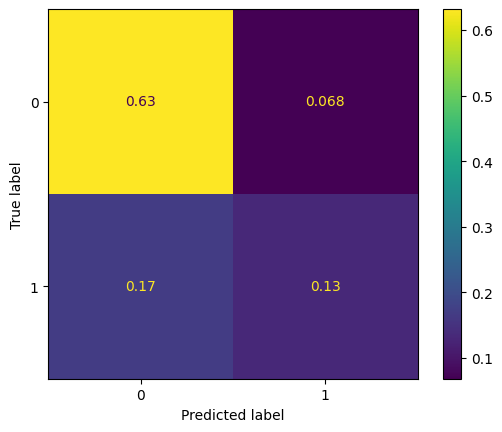

In [ ]:
cm_1 = confusion_matrix(y_test1, y_pred1, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_1)
disp.plot()
plt.show()

Print the classification report

In [ ]:
print(classification_report(y_test1, y_pred1, target_names=['Not approved', 'Approved']))

              precision    recall  f1-score   support

Not approved       0.79      0.90      0.84       175
    Approved       0.66      0.44      0.53        75

    accuracy                           0.76       250
   macro avg       0.73      0.67      0.69       250
weighted avg       0.75      0.76      0.75       250



Accuracy: 0.76

Let us now check which are the evaluation metrics based on the protected attribute foreign. We first split the dataset based on the protected attribute features.

RESULTS FOR FOREIGN_GERMAN


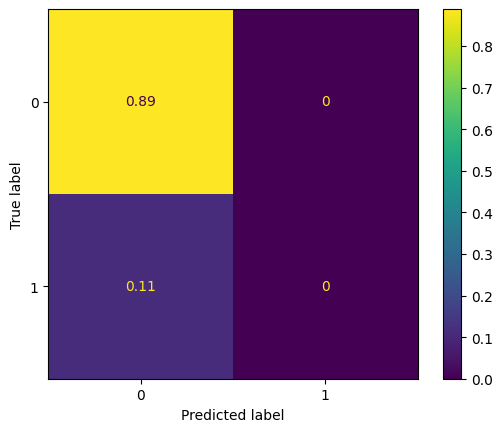

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.00      0.00      0.00         1

    accuracy                           0.89         9
   macro avg       0.44      0.50      0.47         9
weighted avg       0.79      0.89      0.84         9

RESULTS FOR FOREIGN_FOREIGN


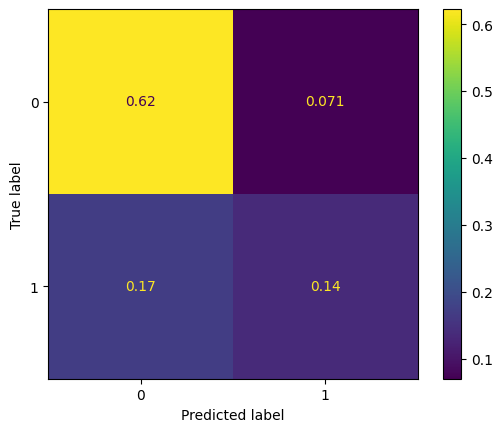

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       167
           1       0.66      0.45      0.53        74

    accuracy                           0.76       241
   macro avg       0.72      0.67      0.69       241
weighted avg       0.75      0.76      0.74       241



In [ ]:
protected_attributes_1 = ['foreign_foreign', 'foreign_german']

dp_1, eoo_1 = protected_statistics(logreg_1, protected_attributes_1, X_test1, y_test1, cm_1)

We also want to measure the fairness of the classifier based on commonly used metrics: demographic parity, equality of opportunityt. For both these metric, an higher value means that the system is favouring the class.

In [ ]:
for idx, et in enumerate(protected_attributes_1):
  print(f'{et.upper()}:\n\tDemographic parity {dp_1[idx]}\n\tEquality of opportunity: {eoo_1[idx]}') 

FOREIGN_FOREIGN:
	Demographic parity 0.007468879668049794
	Equality of opportunity: 0.0021244813278008257
FOREIGN_GERMAN:
	Demographic parity -0.2
	Equality of opportunity: -0.056888888888888905


Considering these indicators, we can say that the model is biasedtowards people having foreign attribute.

#### Dataset 2

We use logistic regression as classifier

In [ ]:
# instantiate the model
logreg_2 = LogisticRegression(random_state=random_state)

# fit the model with data
logreg_2.fit(X_train2, y_train2)

y_pred2 = logreg_2.predict(X_test2)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Generate the confusion matrix

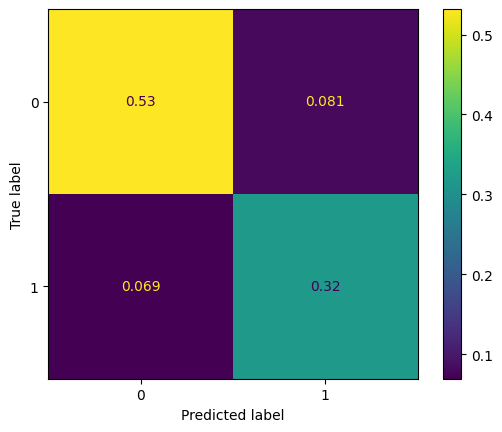

In [ ]:
cm_2 = confusion_matrix(y_test2, y_pred2, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_2)
disp.plot()
plt.show()

Print the classification report

In [ ]:
print(classification_report(y_test2, y_pred2, target_names=['Not approved', 'Approved']))

              precision    recall  f1-score   support

Not approved       0.88      0.87      0.88       106
    Approved       0.80      0.82      0.81        67

    accuracy                           0.85       173
   macro avg       0.84      0.84      0.84       173
weighted avg       0.85      0.85      0.85       173



Split based on protected attribute value

RESULTS FOR ETHNICITY_WHITE


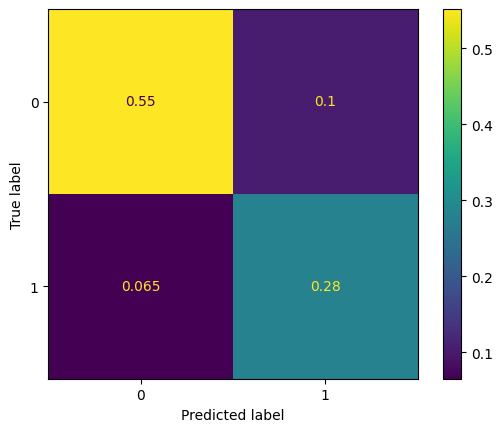

              precision    recall  f1-score   support

           0       0.89      0.84      0.87        70
           1       0.73      0.81      0.77        37

    accuracy                           0.83       107
   macro avg       0.81      0.83      0.82       107
weighted avg       0.84      0.83      0.83       107

RESULTS FOR ETHNICITY_OTHER


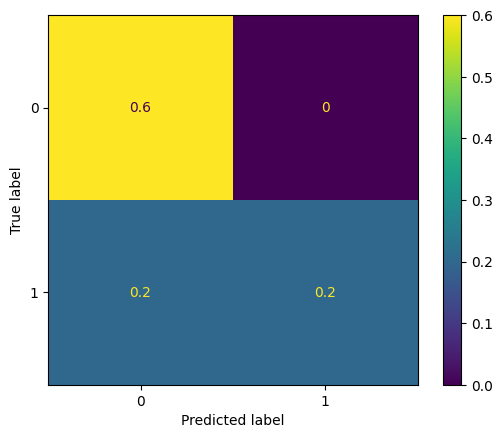

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5

RESULTS FOR ETHNICITY_LATINO


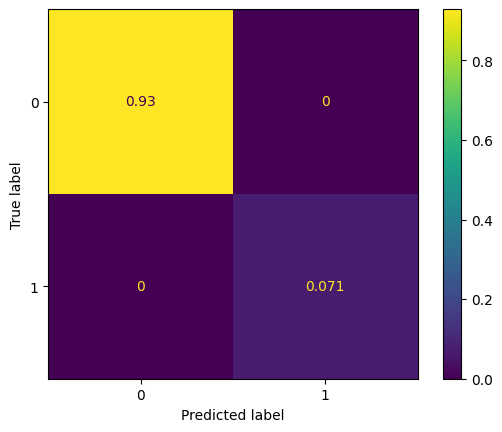

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         1

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

RESULTS FOR ETHNICITY_BLACK


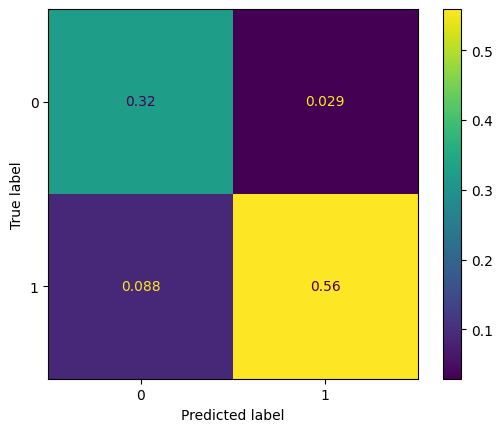

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.95      0.86      0.90        22

    accuracy                           0.88        34
   macro avg       0.87      0.89      0.88        34
weighted avg       0.89      0.88      0.88        34

RESULTS FOR ETHNICITY_ASIAN


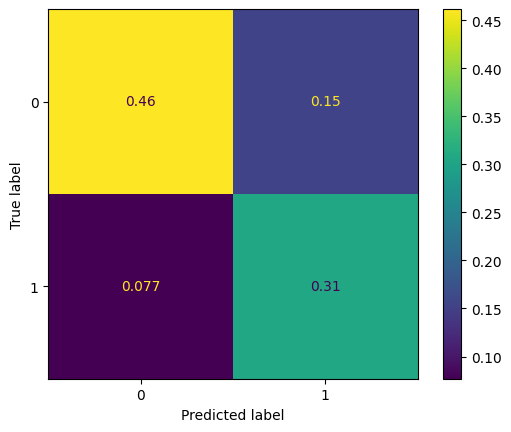

              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.67      0.80      0.73         5

    accuracy                           0.77        13
   macro avg       0.76      0.78      0.76        13
weighted avg       0.78      0.77      0.77        13



In [ ]:
protected_attributes_2 = ['Ethnicity_Asian', 'Ethnicity_Black', 'Ethnicity_Latino', 'Ethnicity_Other', 'Ethnicity_White']
dp_2, eoo_2 = protected_statistics(logreg_2, protected_attributes_2, X_test2, y_test2, cm_2)

Let us look at the demographic parity and equality of opportunity for each ethnicity value.

In [ ]:
for idx, et in enumerate(protected_attributes_2):
  print(f'{et.upper()}:\n\tDemographic parity {dp_2[idx]}\n\tEquality of opportunity: {eoo_2[idx]}') 

ETHNICITY_ASIAN:
	Demographic parity 0.06269453090262339
	Equality of opportunity: 0.007558915073365952
ETHNICITY_BLACK:
	Demographic parity 0.1893913634818089
	Equality of opportunity: 0.01887113226793609
ETHNICITY_LATINO:
	Demographic parity -0.3274153592072667
	Equality of opportunity: -0.06936416184971098
ETHNICITY_OTHER:
	Demographic parity -0.19884393063583816
	Equality of opportunity: 0.13063583815028904
ETHNICITY_WHITE:
	Demographic parity -0.015666360542380242
	Equality of opportunity: -0.003943601102047431


We can see that the model favours the ethnicity black and asian, while it is unfair towards the ethnicity latino.

### SVM

#### Dataset 1

In [ ]:
# instantiate the model
svm_1 = SVC(random_state=random_state)

# fit the model with data
svm_1.fit(X_train1, y_train1)

y_pred1 = svm_1.predict(X_test1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


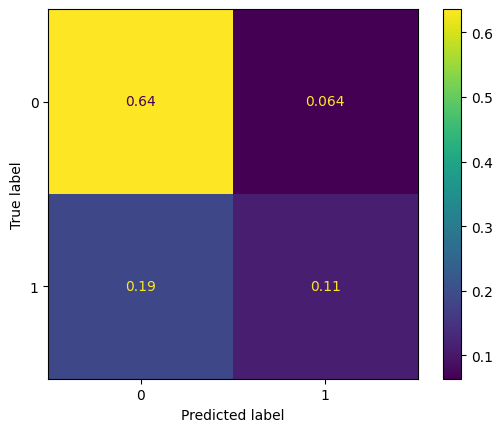

In [ ]:
cm_1 = confusion_matrix(y_test1, y_pred1, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_1)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test1, y_pred1, target_names=['Not approved', 'Approved']))

              precision    recall  f1-score   support

Not approved       0.77      0.91      0.83       175
    Approved       0.64      0.37      0.47        75

    accuracy                           0.75       250
   macro avg       0.70      0.64      0.65       250
weighted avg       0.73      0.75      0.73       250



RESULTS FOR FOREIGN_GERMAN


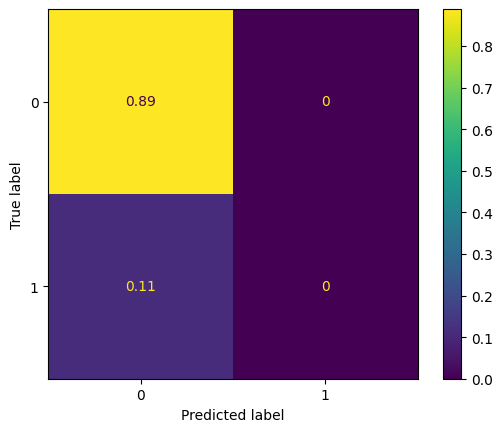

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.00      0.00      0.00         1

    accuracy                           0.89         9
   macro avg       0.44      0.50      0.47         9
weighted avg       0.79      0.89      0.84         9

RESULTS FOR FOREIGN_FOREIGN


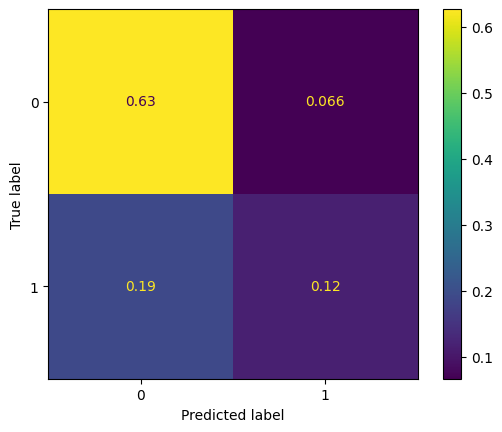

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       167
           1       0.64      0.38      0.47        74

    accuracy                           0.74       241
   macro avg       0.70      0.64      0.65       241
weighted avg       0.73      0.74      0.72       241



In [ ]:
protected_attributes_1 = ['foreign_foreign', 'foreign_german']

dp_1, eoo_1 = protected_statistics(svm_1, protected_attributes_1, X_test1, y_test1, cm_1)

In [ ]:
for idx, et in enumerate(protected_attributes_1):
  print(f'{et.upper()}:\n\tDemographic parity {dp_1[idx]}\n\tEquality of opportunity: {eoo_1[idx]}') 

FOREIGN_FOREIGN:
	Demographic parity 0.006572614107883845
	Equality of opportunity: 0.0028713692946057967
FOREIGN_GERMAN:
	Demographic parity -0.176
	Equality of opportunity: -0.0768888888888889


#### Dataset 2

In [ ]:
# instantiate the model
svm_2 = SVC(random_state=random_state)

# fit the model with data
svm_2.fit(X_train2, y_train2)

y_pred2 = svm_2.predict(X_test2)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


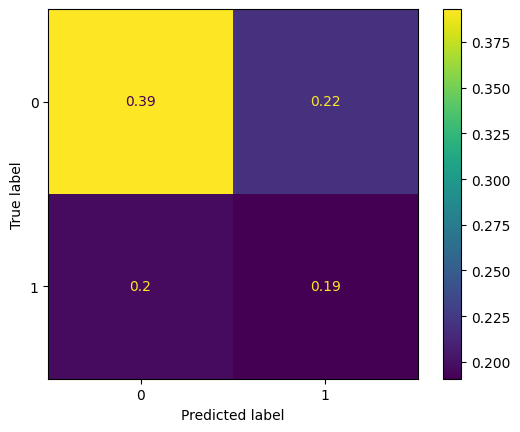

In [ ]:
cm_2 = confusion_matrix(y_test2, y_pred2, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_2)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test2, y_pred2, target_names=['Not approved', 'Approved']))

              precision    recall  f1-score   support

Not approved       0.67      0.64      0.65       106
    Approved       0.46      0.49      0.48        67

    accuracy                           0.58       173
   macro avg       0.57      0.57      0.57       173
weighted avg       0.59      0.58      0.59       173



RESULTS FOR ETHNICITY_WHITE


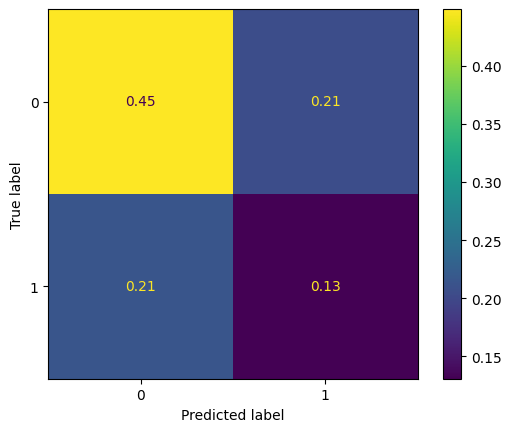

              precision    recall  f1-score   support

           0       0.68      0.69      0.68        70
           1       0.39      0.38      0.38        37

    accuracy                           0.58       107
   macro avg       0.53      0.53      0.53       107
weighted avg       0.58      0.58      0.58       107

RESULTS FOR ETHNICITY_OTHER


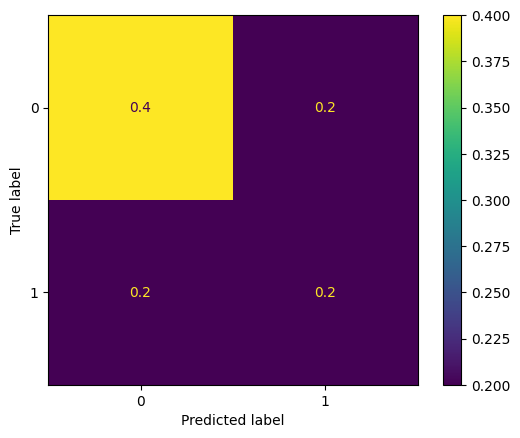

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.50      0.50      0.50         2

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5

RESULTS FOR ETHNICITY_LATINO


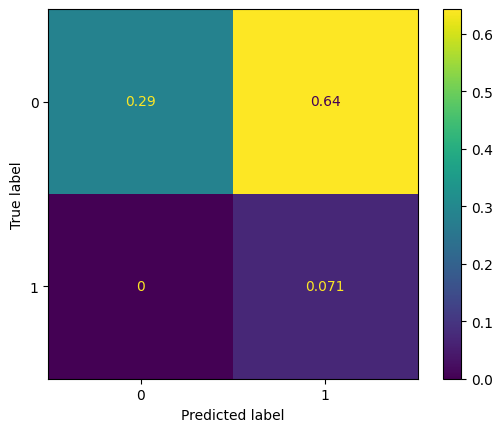

              precision    recall  f1-score   support

           0       1.00      0.31      0.47        13
           1       0.10      1.00      0.18         1

    accuracy                           0.36        14
   macro avg       0.55      0.65      0.33        14
weighted avg       0.94      0.36      0.45        14

RESULTS FOR ETHNICITY_BLACK


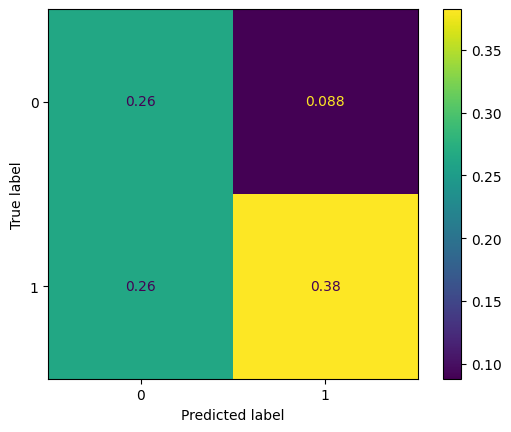

              precision    recall  f1-score   support

           0       0.50      0.75      0.60        12
           1       0.81      0.59      0.68        22

    accuracy                           0.65        34
   macro avg       0.66      0.67      0.64        34
weighted avg       0.70      0.65      0.65        34

RESULTS FOR ETHNICITY_ASIAN


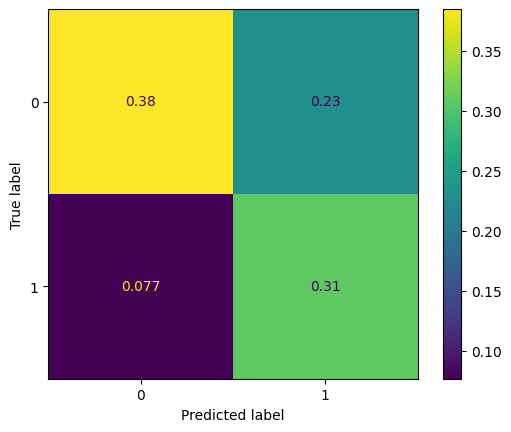

              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.57      0.80      0.67         5

    accuracy                           0.69        13
   macro avg       0.70      0.71      0.69        13
weighted avg       0.73      0.69      0.70        13



In [ ]:
protected_attributes_2 = ['Ethnicity_Asian', 'Ethnicity_Black', 'Ethnicity_Latino', 'Ethnicity_Other', 'Ethnicity_White']
dp_2, eoo_2 = protected_statistics(svm_2, protected_attributes_2, X_test2, y_test2, cm_2)

In [ ]:
for idx, et in enumerate(protected_attributes_2):
  print(f'{et.upper()}:\n\tDemographic parity {dp_2[idx]}\n\tEquality of opportunity: {eoo_2[idx]}') 

ETHNICITY_ASIAN:
	Demographic parity 0.12805691418408194
	Equality of opportunity: -0.11960871498443754
ETHNICITY_BLACK:
	Demographic parity 0.06018361101666103
	Equality of opportunity: 0.06817409044542672
ETHNICITY_LATINO:
	Demographic parity 0.3038810900082577
	Equality of opportunity: -0.19653179190751446
ETHNICITY_OTHER:
	Demographic parity -0.010404624277456587
	Equality of opportunity: 0.0034682080924855474
ETHNICITY_WHITE:
	Demographic parity -0.0739560261466155
	Equality of opportunity: 0.018421479120522916


## 5 - Re-sampling methods

### FAWOS

In [ ]:
class NoValidNeighbors(Exception):
  pass

In [ ]:
def find_weights(pu, neighbors, attributes, X, y):
  weights = []

  for idx, nlist in enumerate(neighbors):
    el = pu.iloc[idx, :]
    proportion = 0
    protected_el = attributes[np.argmax(el[attributes])] 

    for l_idx, n_idx in enumerate(nlist):
      n = X.iloc[n_idx, :]
      y_n = y.loc[n.name][0]
      
      protected_n = attributes[np.argmax(n[attributes])]
      if y_n == 1 and protected_n == protected_el:
        proportion +=1
      else:
        neighbors[idx, l_idx] = -1
   
    weights.append(labels[proportion])
  
  sum_w = np.sum(weights)
  
  if sum_w == 0:
    raise NoValidNeighbors()

  weights = [w/sum_w for w in weights]
  return weights

In [ ]:
def interpolate(first_point, second_point):
  interpolated = (first_point + second_point) / 2
  return interpolated

In [ ]:
def generate_sample(pu, weights, neighbors, X):
  f_idx = np.random.choice(range(len(pu)), p=weights)
  first_point = pu.iloc[f_idx, :]
  
  f_neigh = neighbors[f_idx, :]
  f_neigh = f_neigh[f_neigh >= 0]
  
  s_idx = np.random.choice(f_neigh)
  second_point = X.iloc[s_idx, :]


  new_point = interpolate(first_point, second_point)
  return new_point


In [ ]:
def fawos(X, y, unprivileged_attributes, protected_attributes, pp_df, np_df, pu_df, nu_df):
  X_aug = X.to_numpy()
  y_aug = y.to_numpy()

  neigh = NearestNeighbors(n_neighbors=5, metric='euclidean')
  neigh.fit(X)

  for u in unprivileged_attributes:
    pu = pu_df.loc[pu_df[u] == 1]
    nu = nu_df.loc[nu_df[u] == 1]
    number_of_samples = int(len(pp_df)*len(nu)/len(np_df) - len(pu))
    
    if number_of_samples > 0:
      print(f'Generating {number_of_samples} synthetic points for attribute {u}')
    else:
      print(f'No points need to be generated for attribute {u}')
      continue

    neighbors = neigh.kneighbors(pu, n_neighbors=6, return_distance=False)[:, 1:]

    try:
      weights = find_weights(pu, neighbors, protected_attributes, X, y)
    except NoValidNeighbors:
      print('No valid neighbours. Recomputing using self as valid neighbor')
      neighbors = neigh.kneighbors(pu, n_neighbors=11, return_distance=False)
      weights = find_weights(pu, neighbors, protected_attributes, X, y)

    for i in range(number_of_samples):
      new_sample = generate_sample(pu, weights, neighbors, X)

      X_aug = np.append(X_aug, np.expand_dims(new_sample, 0), axis=0)
      y_aug = np.append(y_aug, 1)

  return X_aug, y_aug


In [ ]:
s_w = 0.00001
b_w = 0.6
r_w = 0.4
o_w = 0

labels = [o_w, r_w, b_w, b_w, s_w, s_w]

#### Logistic regressor

In FAWOS the main objective is to equalize the ratio between positive privileged (PP) and negative privileged (NP) with the ratio between positive unprivileged (PU) and negative unprivileged (NU):

  PP/NP ≃ PU/NU

This means that first we have to define which the privileged and the unprivileged attributes are. We make this selection based on the fairness indicators that we computed before.

In [ ]:
p_1 = ['foreign_foreign']
u_1 = ['foreign_german']

p_2 = ['Ethnicity_Asian', 'Ethnicity_Black']
u_2 = ['Ethnicity_Latino', 'Ethnicity_Other', 'Ethnicity_White']

Let us now compute the ratios to understand which is the initial situation.

In [ ]:
pp_1 = X_train1.loc[(y_train1['Default']==1) & (X_train1[p_1].any(axis=1))]
np_1 = X_train1.loc[(y_train1['Default']==0) & (X_train1[p_1].any(axis=1))]

pu_1 = X_train1.loc[(y_train1['Default']==1) & (X_train1[u_1].any(axis=1))]
nu_1 = X_train1.loc[(y_train1['Default']==0) & (X_train1[u_1].any(axis=1))]


print(f'RATIO FOR DATASET 1\n{len(pp_1) / len(np_1)} =? {len(pu_1) / len(nu_1)}\n')

pp_2 = X_train2.loc[(y_train2['Approved']==1) & (X_train2[p_2].any(axis=1))]
np_2 = X_train2.loc[(y_train2['Approved']==0) & (X_train2[p_2].any(axis=1))]

pu_2 = X_train2.loc[(y_train2['Approved']==1) & (X_train2[u_2].any(axis=1))]
nu_2 = X_train2.loc[(y_train2['Approved']==0) & (X_train2[u_2].any(axis=1))]

print(f'RATIO FOR DATASET 2\n{len(pp_2) / len(np_2)} =? {len(pu_2) / len(nu_2)}')

RATIO FOR DATASET 1
0.444 =? 0.12

RATIO FOR DATASET 2
1.3076923076923077 =? 0.7311320754716981


To balance the situation, we want to create new datapoints for the positive unprivileged group. We do this using the algorithm described in the paper. At the end of the process, we have an augmented dataset containing new datapoints in the positive unprivileged class.

In [ ]:
X_train1_aug, y_train1_aug = fawos(X_train1, y_train1, u_1, protected_attributes_1, pp_1, np_1, pu_1, nu_1)
X_train2_aug, y_train2_aug = fawos(X_train2, y_train2, u_2, protected_attributes_2, pp_2, np_2, pu_2, nu_2)

Generating 8 for attribute foreign_german
No valid neighbours. Recomputing using self as valid neighbor
Generating 40 for attribute Ethnicity_Latino
Generating 2 for attribute Ethnicity_Other
Generating 79 for attribute Ethnicity_White


Let us check whether the ratio is now better

In [ ]:
X_train1_aug = pd.DataFrame(X_train1_aug, columns=X_train1.columns)
y_train1_aug = pd.DataFrame(y_train1_aug, columns=y_train1.columns)

X_train2_aug = pd.DataFrame(X_train2_aug, columns=X_train2.columns)
y_train2_aug = pd.DataFrame(y_train2_aug, columns=y_train2.columns)

In [ ]:
pp_1 = X_train1_aug.loc[(y_train1_aug['Default']==1) & (X_train1_aug[p_1].any(axis=1))]
np_1 = X_train1_aug.loc[(y_train1_aug['Default']==0) & (X_train1_aug[p_1].any(axis=1))]

pu_1 = X_train1_aug.loc[(y_train1_aug['Default']==1) & (X_train1_aug[u_1].any(axis=1))]
nu_1 = X_train1_aug.loc[(y_train1_aug['Default']==0) & (X_train1_aug[u_1].any(axis=1))]


print(f'RATIO FOR AUGMENTED DATASET 1\n{len(pp_1) / len(np_1)} =? {len(pu_1) / len(nu_1)}\n')

pp_2 = X_train2_aug.loc[(y_train2_aug['Approved']==1) & (X_train2_aug[p_2].any(axis=1))]
np_2 = X_train2_aug.loc[(y_train2_aug['Approved']==0) & (X_train2_aug[p_2].any(axis=1))]

pu_2 = X_train2_aug.loc[(y_train2_aug['Approved']==1) & (X_train2_aug[u_2].any(axis=1))]
nu_2 = X_train2_aug.loc[(y_train2_aug['Approved']==0) & (X_train2_aug[u_2].any(axis=1))]

print(f'RATIO FOR AUGMENTED DATASET 2\n{len(pp_2) / len(np_2)} =? {len(pu_2) / len(nu_2)}')

RATIO FOR AUGMENTED DATASET 1
0.444 =? 0.44

RATIO FOR AUGMENTED DATASET 2
1.3076923076923077 =? 1.3018867924528301


##### Results for Dataset 1

              precision    recall  f1-score   support

Not approved       0.80      0.90      0.84       175
    Approved       0.66      0.47      0.55        75

    accuracy                           0.77       250
   macro avg       0.73      0.68      0.70       250
weighted avg       0.76      0.77      0.75       250



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


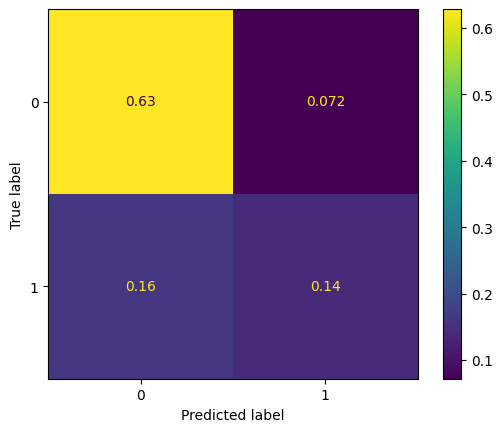

In [ ]:
logreg_1.fit(X_train1_aug, y_train1_aug)

y_pred1_aug = logreg_1.predict(X_test1)

print(classification_report(y_test1, y_pred1_aug, target_names=['Not approved', 'Approved']))

cm_1 = confusion_matrix(y_test1, y_pred1_aug, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_1)
disp.plot()
plt.show()

RESULTS FOR FOREIGN_GERMAN


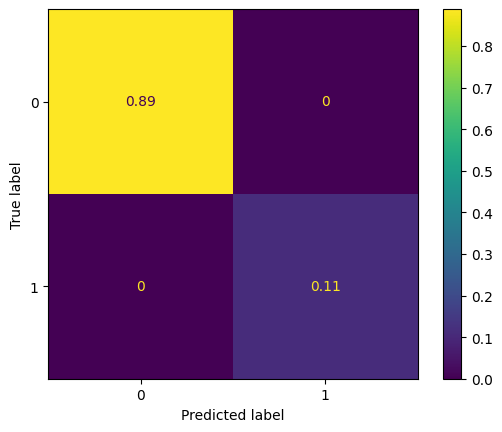

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         1

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

RESULTS FOR FOREIGN_FOREIGN


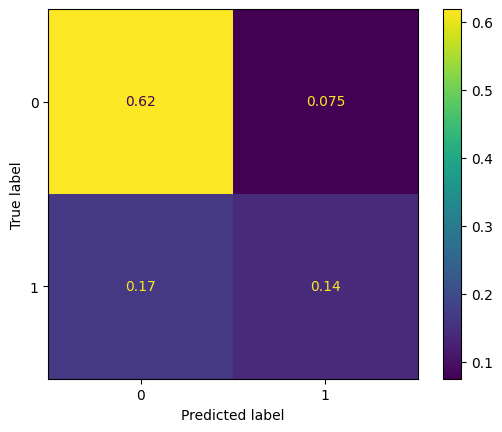

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       167
           1       0.65      0.46      0.54        74

    accuracy                           0.76       241
   macro avg       0.72      0.68      0.69       241
weighted avg       0.75      0.76      0.75       241



In [ ]:
dp_1, eoo_1 = protected_statistics(logreg_1, protected_attributes_1, X_test1, y_test1, cm_1)

In [ ]:
for idx, et in enumerate(protected_attributes_1):
  print(f'{et.upper()}:\n\tDemographic parity {dp_1[idx]}\n\tEquality of opportunity: {eoo_1[idx]}') 

FOREIGN_FOREIGN:
	Demographic parity 0.003767634854771773
	Equality of opportunity: 0.005975103734439824
FOREIGN_GERMAN:
	Demographic parity -0.10088888888888892
	Equality of opportunity: -0.16


##### Results for Dataset 2

              precision    recall  f1-score   support

Not approved       0.92      0.82      0.87       106
    Approved       0.76      0.88      0.81        67

    accuracy                           0.84       173
   macro avg       0.84      0.85      0.84       173
weighted avg       0.85      0.84      0.85       173



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


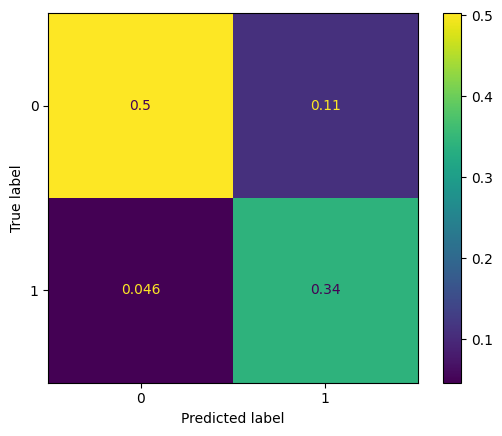

In [ ]:
logreg_2.fit(X_train2_aug, y_train2_aug)

y_pred2_aug = logreg_2.predict(X_test2)

print(classification_report(y_test2, y_pred2_aug, target_names=['Not approved', 'Approved']))

cm_2 = confusion_matrix(y_test2, y_pred2_aug, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_2)
disp.plot()
plt.show()

RESULTS FOR ETHNICITY_WHITE


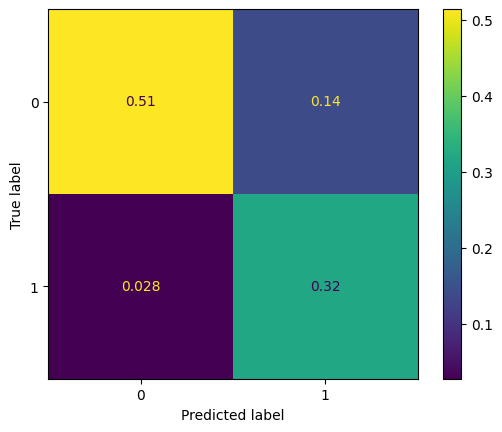

              precision    recall  f1-score   support

           0       0.95      0.79      0.86        70
           1       0.69      0.92      0.79        37

    accuracy                           0.83       107
   macro avg       0.82      0.85      0.83       107
weighted avg       0.86      0.83      0.84       107

RESULTS FOR ETHNICITY_OTHER


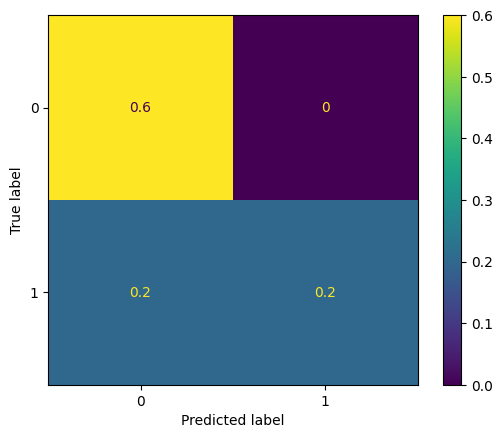

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5

RESULTS FOR ETHNICITY_LATINO


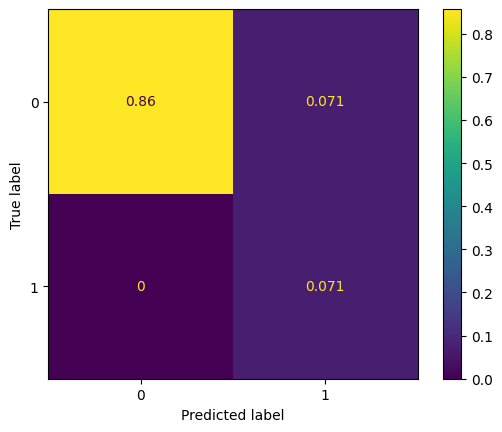

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.50      1.00      0.67         1

    accuracy                           0.93        14
   macro avg       0.75      0.96      0.81        14
weighted avg       0.96      0.93      0.94        14

RESULTS FOR ETHNICITY_BLACK


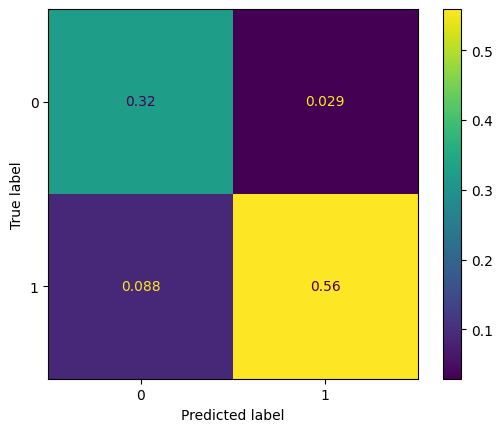

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.95      0.86      0.90        22

    accuracy                           0.88        34
   macro avg       0.87      0.89      0.88        34
weighted avg       0.89      0.88      0.88        34

RESULTS FOR ETHNICITY_ASIAN


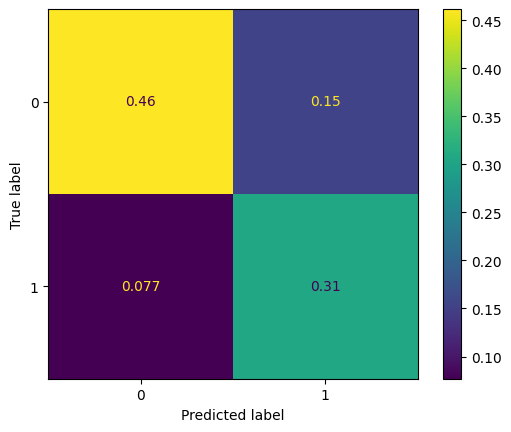

              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.67      0.80      0.73         5

    accuracy                           0.77        13
   macro avg       0.76      0.78      0.76        13
weighted avg       0.78      0.77      0.77        13



In [ ]:
dp_2, eoo_2 = protected_statistics(logreg_2, protected_attributes_2, X_test2, y_test2, cm_2)

In [ ]:
for idx, et in enumerate(protected_attributes_2):
  print(f'{et.upper()}:\n\tDemographic parity {dp_2[idx]}\n\tEquality of opportunity: {eoo_2[idx]}') 

ETHNICITY_ASIAN:
	Demographic parity 0.01067140951534018
	Equality of opportunity: 0.03068030235660294
ETHNICITY_BLACK:
	Demographic parity 0.1373682420945257
	Equality of opportunity: 0.04199251955117308
ETHNICITY_LATINO:
	Demographic parity -0.30800990916597853
	Equality of opportunity: -0.046242774566473986
ETHNICITY_OTHER:
	Demographic parity -0.2508670520231214
	Equality of opportunity: 0.15375722543352602
ETHNICITY_WHITE:
	Demographic parity 0.0070768732105234156
	Equality of opportunity: -0.018205391388903893


#### SVM

In [ ]:
p_1 = ['foreign_foreign']
u_1 = ['foreign_german']

p_2 = ['Ethnicity_Asian', 'Ethnicity_Black', 'Ethnicity_Latino']
u_2 = ['Ethnicity_Other', 'Ethnicity_White']

In [ ]:
pp_1 = X_train1.loc[(y_train1['Default']==1) & (X_train1[p_1].any(axis=1))]
np_1 = X_train1.loc[(y_train1['Default']==0) & (X_train1[p_1].any(axis=1))]

pu_1 = X_train1.loc[(y_train1['Default']==1) & (X_train1[u_1].any(axis=1))]
nu_1 = X_train1.loc[(y_train1['Default']==0) & (X_train1[u_1].any(axis=1))]


print(f'RATIO FOR DATASET 1\n{len(pp_1) / len(np_1)} =? {len(pu_1) / len(nu_1)}\n')

pp_2 = X_train2.loc[(y_train2['Approved']==1) & (X_train2[p_2].any(axis=1))]
np_2 = X_train2.loc[(y_train2['Approved']==0) & (X_train2[p_2].any(axis=1))]

pu_2 = X_train2.loc[(y_train2['Approved']==1) & (X_train2[u_2].any(axis=1))]
nu_2 = X_train2.loc[(y_train2['Approved']==0) & (X_train2[u_2].any(axis=1))]

print(f'RATIO FOR DATASET 2\n{len(pp_2) / len(np_2)} =? {len(pu_2) / len(nu_2)}')

RATIO FOR DATASET 1
0.444 =? 0.12

RATIO FOR DATASET 2
0.9108910891089109 =? 0.8409090909090909


In [ ]:
X_train1_aug, y_train1_aug = fawos(X_train1, y_train1, u_1, protected_attributes_1, pp_1, np_1, pu_1, nu_1)
X_train2_aug, y_train2_aug = fawos(X_train2, y_train2, u_2, protected_attributes_2, pp_2, np_2, pu_2, nu_2)

Generating 8 synthetic points for attribute foreign_german
No valid neighbours. Recomputing using self as valid neighbor
No points need to be generated for attribute Ethnicity_Other
Generating 14 synthetic points for attribute Ethnicity_White


In [ ]:
X_train1_aug = pd.DataFrame(X_train1_aug, columns=X_train1.columns)
y_train1_aug = pd.DataFrame(y_train1_aug, columns=y_train1.columns)

X_train2_aug = pd.DataFrame(X_train2_aug, columns=X_train2.columns)
y_train2_aug = pd.DataFrame(y_train2_aug, columns=y_train2.columns)

In [ ]:
pp_1 = X_train1_aug.loc[(y_train1_aug['Default']==1) & (X_train1_aug[p_1].any(axis=1))]
np_1 = X_train1_aug.loc[(y_train1_aug['Default']==0) & (X_train1_aug[p_1].any(axis=1))]

pu_1 = X_train1_aug.loc[(y_train1_aug['Default']==1) & (X_train1_aug[u_1].any(axis=1))]
nu_1 = X_train1_aug.loc[(y_train1_aug['Default']==0) & (X_train1_aug[u_1].any(axis=1))]


print(f'RATIO FOR AUGMENTED DATASET 1\n{len(pp_1) / len(np_1)} =? {len(pu_1) / len(nu_1)}\n')

pp_2 = X_train2_aug.loc[(y_train2_aug['Approved']==1) & (X_train2_aug[p_2].any(axis=1))]
np_2 = X_train2_aug.loc[(y_train2_aug['Approved']==0) & (X_train2_aug[p_2].any(axis=1))]

pu_2 = X_train2_aug.loc[(y_train2_aug['Approved']==1) & (X_train2_aug[u_2].any(axis=1))]
nu_2 = X_train2_aug.loc[(y_train2_aug['Approved']==0) & (X_train2_aug[u_2].any(axis=1))]

print(f'RATIO FOR AUGMENTED DATASET 2\n{len(pp_2) / len(np_2)} =? {len(pu_2) / len(nu_2)}')

RATIO FOR AUGMENTED DATASET 1
0.444 =? 0.44

RATIO FOR AUGMENTED DATASET 2
0.9108910891089109 =? 0.9204545454545454


##### Results for Dataset 1

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

Not approved       0.79      0.90      0.84       175
    Approved       0.65      0.43      0.52        75

    accuracy                           0.76       250
   macro avg       0.72      0.66      0.68       250
weighted avg       0.75      0.76      0.74       250



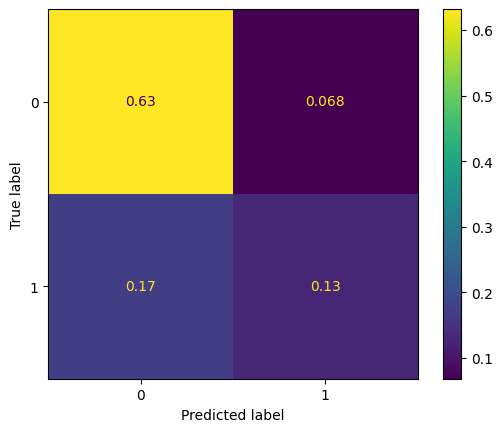

In [ ]:
svm_1.fit(X_train1_aug, y_train1_aug)

y_pred1_aug = svm_1.predict(X_test1)

print(classification_report(y_test1, y_pred1_aug, target_names=['Not approved', 'Approved']))

cm_1 = confusion_matrix(y_test1, y_pred1_aug, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_1)
disp.plot()
plt.show()

RESULTS FOR FOREIGN_GERMAN


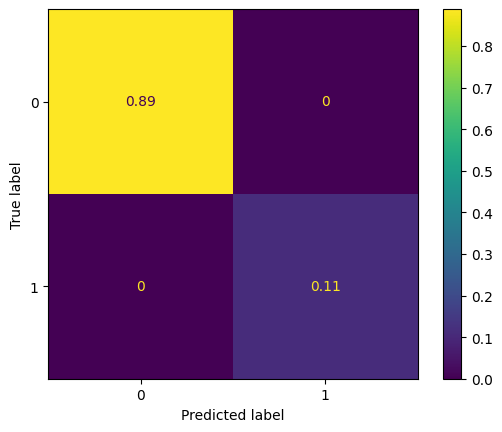

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         1

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

RESULTS FOR FOREIGN_FOREIGN


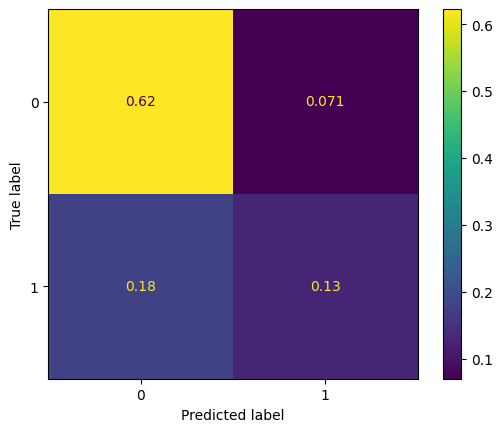

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       167
           1       0.65      0.42      0.51        74

    accuracy                           0.75       241
   macro avg       0.71      0.66      0.67       241
weighted avg       0.74      0.75      0.73       241



In [ ]:
dp_1, eoo_1 = protected_statistics(svm_1, protected_attributes_1, X_test1, y_test1, cm_1)

In [ ]:
for idx, et in enumerate(protected_attributes_1):
  print(f'{et.upper()}:\n\tDemographic parity {dp_1[idx]}\n\tEquality of opportunity: {eoo_1[idx]}') 

FOREIGN_FOREIGN:
	Demographic parity 0.0031701244813277796
	Equality of opportunity: 0.00642323651452284
FOREIGN_GERMAN:
	Demographic parity -0.0848888888888889
	Equality of opportunity: -0.172


##### Results for Dataset 2

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

Not approved       0.68      0.64      0.66       106
    Approved       0.48      0.52      0.50        67

    accuracy                           0.60       173
   macro avg       0.58      0.58      0.58       173
weighted avg       0.60      0.60      0.60       173



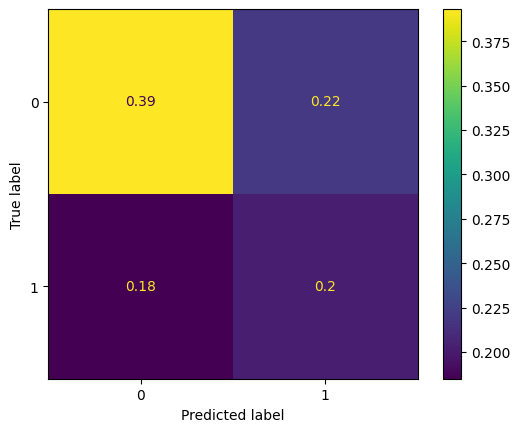

In [ ]:
svm_2.fit(X_train2_aug, y_train2_aug)

y_pred2_aug = svm_2.predict(X_test2)

print(classification_report(y_test2, y_pred2_aug, target_names=['Not approved', 'Approved']))

cm_2 = confusion_matrix(y_test2, y_pred2_aug, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_2)
disp.plot()
plt.show()

RESULTS FOR ETHNICITY_WHITE


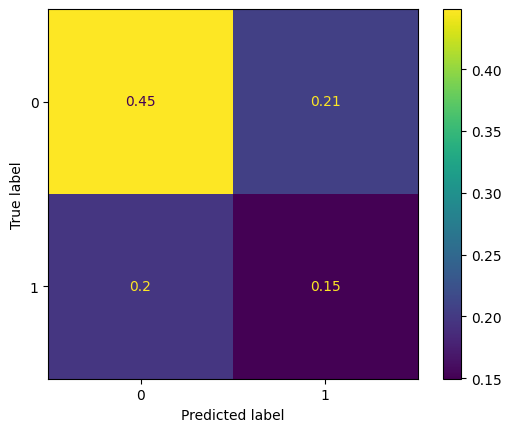

              precision    recall  f1-score   support

           0       0.70      0.69      0.69        70
           1       0.42      0.43      0.43        37

    accuracy                           0.60       107
   macro avg       0.56      0.56      0.56       107
weighted avg       0.60      0.60      0.60       107

RESULTS FOR ETHNICITY_OTHER


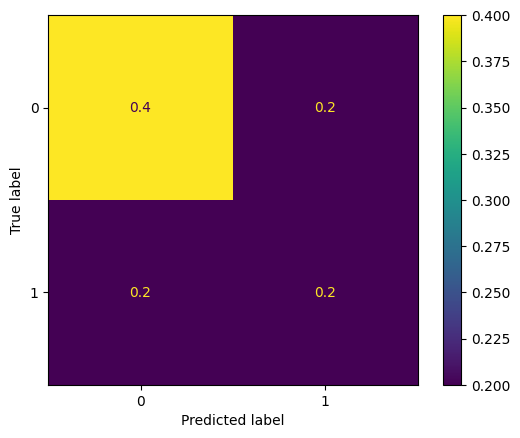

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.50      0.50      0.50         2

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5

RESULTS FOR ETHNICITY_LATINO


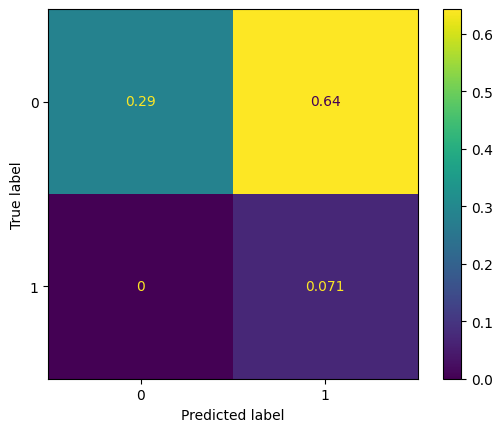

              precision    recall  f1-score   support

           0       1.00      0.31      0.47        13
           1       0.10      1.00      0.18         1

    accuracy                           0.36        14
   macro avg       0.55      0.65      0.33        14
weighted avg       0.94      0.36      0.45        14

RESULTS FOR ETHNICITY_BLACK


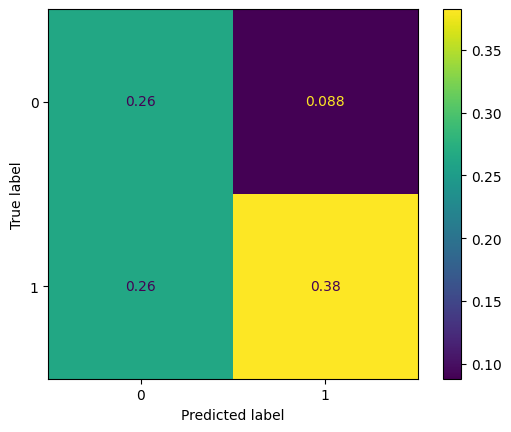

              precision    recall  f1-score   support

           0       0.50      0.75      0.60        12
           1       0.81      0.59      0.68        22

    accuracy                           0.65        34
   macro avg       0.66      0.67      0.64        34
weighted avg       0.70      0.65      0.65        34

RESULTS FOR ETHNICITY_ASIAN


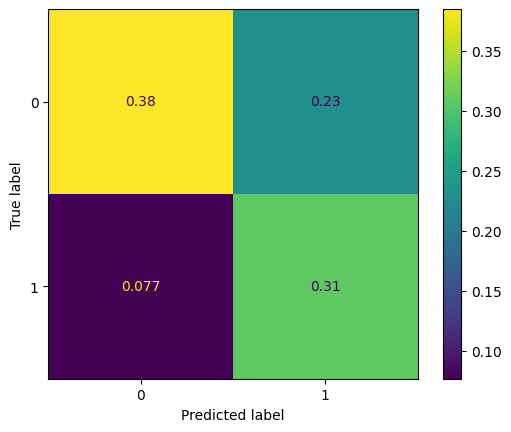

              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.57      0.80      0.67         5

    accuracy                           0.69        13
   macro avg       0.70      0.71      0.69        13
weighted avg       0.73      0.69      0.70        13



In [ ]:
dp_2, eoo_2 = protected_statistics(svm_2, protected_attributes_2, X_test2, y_test2, cm_2)

In [ ]:
for idx, et in enumerate(protected_attributes_2):
  print(f'{et.upper()}:\n\tDemographic parity {dp_2[idx]}\n\tEquality of opportunity: {eoo_2[idx]}') 

ETHNICITY_ASIAN:
	Demographic parity 0.11649622054246339
	Equality of opportunity: -0.10804802134281902
ETHNICITY_BLACK:
	Demographic parity 0.048622917375042485
	Equality of opportunity: 0.07973478408704524
ETHNICITY_LATINO:
	Demographic parity 0.29232039636663915
	Equality of opportunity: -0.18497109826589594
ETHNICITY_OTHER:
	Demographic parity -0.021965317919075134
	Equality of opportunity: 0.015028901734104066
ETHNICITY_WHITE:
	Demographic parity -0.06682513100318732
	Equality of opportunity: 0.011290583977094704


### Fair-SMOTE

#### Logistic regressor

In [ ]:
from sklearn.utils import resample
from sklearn.neighbors import NearestNeighbors
from random import randrange
import random




*   **FairSMOTE** works by dividing the dataset into subgroups, each one correspoinding to specific values for the sensitive attributes and for the class.
*   Each subgroup will be then incremented by adding new generated samples in order to make them have the same cardinality.




In [ ]:
def generate_samples_fair_smote(X, k_neighbors=2, n_samples=100, random_state=None):

    # list where all the new generated data will be stored
    new_data = []

    # loop for a n. of times = n. of new data which we must add
    for i in range(n_samples-X.shape[0]):

      #select a random element from the subgroup to use as parent
      p = randrange(X.shape[0])
      parent = X.iloc[p]

      # find the 2 nn of the randomly selected element
      knn = NearestNeighbors(n_neighbors=k_neighbors+1)
      knn.fit(X.values)
      neighbors = knn.kneighbors([parent], return_distance=False)
      
      # set the 2 fair smote hyperparameters as suggested by the original paper
      cr = 0.8
      f = 0.8

      # generate new sample
      new_candidate = []

      for key,value in parent.items():
        if isinstance(parent[key], np.bool_):
                el = randrange(3)
                new_candidate.append(X.iloc[neighbors[0][el]][key])
        else:
                if random.random() > cr:
                  new_candidate.append(abs(parent[key] + f * (X.iloc[neighbors[0][1]][key] - X.iloc[neighbors[0][2]][key])))
                else: 
                  new_candidate.append(parent[key])
      new_data.append(new_candidate)
        
    return new_data

##### Dataset 1

In [ ]:
X1=X_train1.copy()

In [ ]:
for col in X1.columns:
    if col not in numerical_df1:
        X1[col] = X1[col].astype(bool)

In [ ]:
#count the n. of elems for each subgroup:

f_0 = X1[(X1['foreign_foreign']==1) & (y_train1['Default']==0)]
f_1 = X1[(X1['foreign_foreign']==1) & (y_train1['Default']==1)]
g_0 = X1[(X1['foreign_german']==1) & (y_train1['Default']==0)]
g_1 = X1[(X1['foreign_german']==1) & (y_train1['Default']==1)]

In [ ]:
print(f"foreign not approved:\t{f_0.shape[0]}")
print(f"foreign approved:\t{f_1.shape[0]}")
print(f"german not approved:\t{g_0.shape[0]}")
print(f"german approved:\t{g_1.shape[0]}")

foreign not approved:	500
foreign approved:	222
german not approved:	25
german approved:	3


In [ ]:
# Apply FairSMOTE to every group except the one with the biggest cardinality (in this case the first one)

n_samples = max([len(f_0),len(f_1),len(g_0),len(g_1)])

new_X = generate_samples_fair_smote(f_1, k_neighbors=2, n_samples=n_samples, random_state=random_state)
f_1 = pd.concat([f_1, pd.DataFrame(new_X, columns = X1.columns.values)])

new_X = generate_samples_fair_smote(g_0, k_neighbors=2, n_samples=n_samples, random_state=random_state)
g_0 = pd.concat([g_0, pd.DataFrame(new_X, columns = X1.columns.values)])

new_X = generate_samples_fair_smote(g_1, k_neighbors=2, n_samples=n_samples, random_state=random_state)
g_1 = pd.concat([g_1, pd.DataFrame(new_X, columns = X1.columns.values)])

In [ ]:
print(f"foreign not approved:\t{f_0.shape[0]}")
print(f"foreign approved:\t{f_1.shape[0]}")
print(f"german not approved:\t{g_0.shape[0]}")
print(f"german approved:\t{g_1.shape[0]}")

foreign not approved:	500
foreign approved:	500
german not approved:	500
german approved:	500


Now the subgroups will be merged into one

In [ ]:
X1_final = pd.concat([f_0,f_1,g_0,g_1], ignore_index=True)
y1_final = pd.DataFrame([0 for i in range(n_samples)] + [1 for i in range(n_samples)]  + [0 for i in range(n_samples)]  + [1 for i in range(n_samples)])

In [ ]:
# the rows of X and y are shuffled 
idx = np.random.RandomState(seed=random_state).permutation(X1_final.index)

X1_final = X1_final.reindex(idx)
y1_final = y1_final.reindex(idx)

In [ ]:
X1_final.head()

,duration,amount,installment,residence,age,cards,liable,checkingstatus1_<DM0,checkingstatus1_DM0-200,checkingstatus1_DM200+,...,employ_1-7years,employ_7+years,employ_unemployed,sex_female,housing_forfree,housing_own,housing_rent,tele_yes,foreign_foreign,foreign_german
1967,0.235294,0.109222,1.000000,0.333333,0.250000,0.333333,0.0,True,False,False,...,True,True,False,False,False,True,False,True,False,True
1332,0.029412,0.023429,0.000000,0.533333,0.982143,0.666667,1.0,True,False,False,...,False,False,False,False,False,True,False,False,False,True
1263,0.073529,0.183064,0.000000,0.333333,0.125000,0.000000,1.0,False,False,False,...,True,False,False,False,False,True,False,False,False,True
516,0.250000,0.113844,0.333333,0.000000,0.250000,0.000000,0.0,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1491,0.294118,0.082370,1.000000,0.000000,0.089286,0.000000,0.0,True,False,False,...,False,False,False,True,False,True,False,False,False,True


In [ ]:
y1_final.head()

,0
1967,1
1332,0
1263,0
516,1
1491,0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

Not approved       0.83      0.62      0.71       175
    Approved       0.44      0.69      0.54        75

    accuracy                           0.64       250
   macro avg       0.63      0.66      0.62       250
weighted avg       0.71      0.64      0.66       250



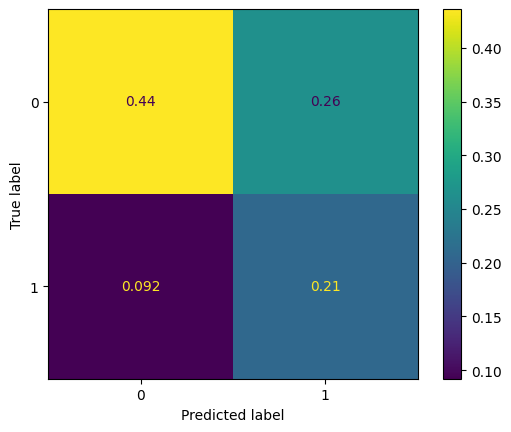

In [ ]:
logreg_1 = LogisticRegression(random_state=random_state)

logreg_1.fit(X1_final, y1_final)

y1_pred = logreg_1.predict(X_test1)

print(classification_report(y_test1, y1_pred, target_names=['Not approved', 'Approved']))

cm_1 = confusion_matrix(y_test1, y1_pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_1)
disp.plot()
plt.show()

RESULTS FOR FOREIGN_GERMAN


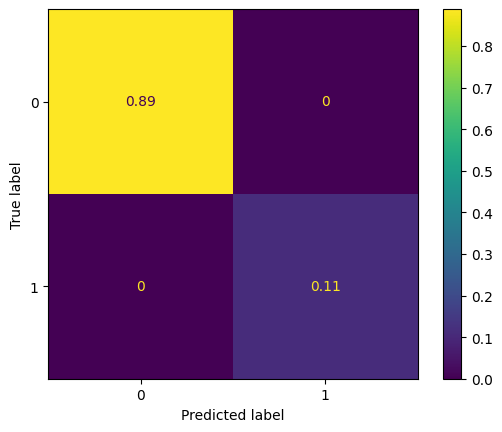

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         1

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

RESULTS FOR FOREIGN_FOREIGN


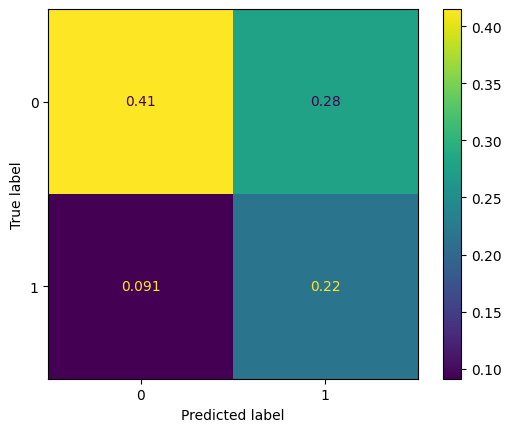

              precision    recall  f1-score   support

           0       0.82      0.60      0.69       167
           1       0.44      0.70      0.54        74

    accuracy                           0.63       241
   macro avg       0.63      0.65      0.62       241
weighted avg       0.70      0.63      0.65       241



In [ ]:
dp_1, eoo_1 = protected_statistics(logreg_1, protected_attributes_1, pd.DataFrame(X_test1, columns=X_test1.columns), pd.DataFrame(y_test1), cm_1)

In [ ]:
for idx, et in enumerate(protected_attributes_1):
  print(f'{et.upper()}:\n\tDemographic parity {dp_1[idx]}\n\tEquality of opportunity: {eoo_1[idx]}') 

FOREIGN_FOREIGN:
	Demographic parity 0.013775933609958546
	Equality of opportunity: 0.0032863070539419087
FOREIGN_GERMAN:
	Demographic parity -0.3688888888888889
	Equality of opportunity: -0.088


##### Dataset 2

In [ ]:
X2=X_train2.copy()

In [ ]:
for col in X2.columns:
    if col not in numerical_df2:
        X2[col] = X2[col].astype(bool)

In [ ]:
#count the n. of elems for each subgroup:

a_0 = X2[(X2['Ethnicity_Asian']==1) & (y_train2['Approved']==0)]
a_1 = X2[(X2['Ethnicity_Asian']==1) & (y_train2['Approved']==1)]
b_0 = X2[(X2['Ethnicity_Black']==1) & (y_train2['Approved']==0)]
b_1 = X2[(X2['Ethnicity_Black']==1) & (y_train2['Approved']==1)]
l_0 = X2[(X2['Ethnicity_Latino']==1) & (y_train2['Approved']==0)]
l_1 = X2[(X2['Ethnicity_Latino']==1) & (y_train2['Approved']==1)]
o_0 = X2[(X2['Ethnicity_Other']==1) & (y_train2['Approved']==0)]
o_1 = X2[(X2['Ethnicity_Other']==1) & (y_train2['Approved']==1)]
w_0 = X2[(X2['Ethnicity_White']==1) & (y_train2['Approved']==0)]
w_1 = X2[(X2['Ethnicity_White']==1) & (y_train2['Approved']==1)]

In [ ]:
print(f"asian not approved:\t{a_0.shape[0]}")
print(f"asian approved:\t\t{a_1.shape[0]}")
print(f"black not approved:\t{b_0.shape[0]}")
print(f"black approved:\t\t{b_1.shape[0]}")
print(f"latino not approved:\t{l_0.shape[0]}")
print(f"latino approved:\t{l_1.shape[0]}")
print(f"other not approved:\t{o_0.shape[0]}")
print(f"other approved:\t\t{o_1.shape[0]}")
print(f"white not approved:\t{w_0.shape[0]}")
print(f"white approved:\t\t{w_1.shape[0]}")

asian not approved:	26
asian approved:		20
black not approved:	39
black approved:		65
latino not approved:	36
latino approved:	7
other not approved:	11
other approved:		12
white not approved:	165
white approved:		136


In [ ]:
# Apply FairSMOTE to every group except the one with the biggest cardinality (in this case white not approved)

n_samples = 165

new_X = generate_samples_fair_smote(a_0, k_neighbors=2, n_samples=n_samples, random_state=random_state)
a_0 = pd.concat([a_0, pd.DataFrame(new_X, columns = X2.columns.values)])

new_X = generate_samples_fair_smote(a_1, k_neighbors=2, n_samples=n_samples, random_state=random_state)
a_1 = pd.concat([a_1, pd.DataFrame(new_X, columns = X2.columns.values)])

new_X = generate_samples_fair_smote(b_0, k_neighbors=2, n_samples=n_samples, random_state=random_state)
b_0 = pd.concat([b_0, pd.DataFrame(new_X, columns = X2.columns.values)])

new_X = generate_samples_fair_smote(b_1, k_neighbors=2, n_samples=n_samples, random_state=random_state)
b_1 = pd.concat([b_1, pd.DataFrame(new_X, columns = X2.columns.values)])

new_X = generate_samples_fair_smote(l_0, k_neighbors=2, n_samples=n_samples, random_state=random_state)
l_0 = pd.concat([l_0, pd.DataFrame(new_X, columns = X2.columns.values)])

new_X = generate_samples_fair_smote(l_1, k_neighbors=2, n_samples=n_samples, random_state=random_state)
l_1 = pd.concat([l_1, pd.DataFrame(new_X, columns = X2.columns.values)])

new_X = generate_samples_fair_smote(o_0, k_neighbors=2, n_samples=n_samples, random_state=random_state)
o_0 = pd.concat([o_0, pd.DataFrame(new_X, columns = X2.columns.values)])

new_X = generate_samples_fair_smote(o_1, k_neighbors=2, n_samples=n_samples, random_state=random_state)
o_1 = pd.concat([o_1, pd.DataFrame(new_X, columns = X2.columns.values)])

new_X = generate_samples_fair_smote(w_1, k_neighbors=2, n_samples=n_samples, random_state=random_state)
w_1 = pd.concat([w_1, pd.DataFrame(new_X, columns = X2.columns.values)])

In [ ]:
print(f"asian not approved:\t{a_0.shape[0]}")
print(f"asian approved:\t\t{a_1.shape[0]}")
print(f"black not approved:\t{b_0.shape[0]}")
print(f"black approved:\t\t{b_1.shape[0]}")
print(f"latino not approved:\t{l_0.shape[0]}")
print(f"latino approved:\t{l_1.shape[0]}")
print(f"other not approved:\t{o_0.shape[0]}")
print(f"other approved:\t\t{o_1.shape[0]}")
print(f"white not approved:\t{w_0.shape[0]}")
print(f"white approved:\t\t{w_1.shape[0]}")

asian not approved:	165
asian approved:		165
black not approved:	165
black approved:		165
latino not approved:	165
latino approved:	165
other not approved:	165
other approved:		165
white not approved:	165
white approved:		165


In [ ]:
X2_final = pd.concat([a_0,a_1,b_0,b_1,l_0,l_1,o_0,o_1,w_0,w_1], ignore_index=True)
y2_final = pd.DataFrame([0 for i in range(n_samples)] + [1 for i in range(n_samples)]  + [0 for i in range(n_samples)]  + [1 for i in range(n_samples)] + [0 for i in range(n_samples)]  + [1 for i in range(n_samples)] + [0 for i in range(n_samples)]  + [1 for i in range(n_samples)] + [0 for i in range(n_samples)]  + [1 for i in range(n_samples)])

In [ ]:
# the rows of X and y are shuffled 
idx = np.random.RandomState(seed=random_state).permutation(X2_final.index)

X2_final = X2_final.reindex(idx)
y2_final = y2_final.reindex(idx)

In [ ]:
X2_final.head()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,...,Industry_Transport,Industry_Utilities,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Latino,Ethnicity_Other,Ethnicity_White,Citizen_ByBirth,Citizen_ByOtherMeans,Citizen_Temporary
845,True,0.664030,0.336250,True,True,0.505789,True,True,0.164179,True,...,False,False,False,False,True,False,False,True,False,False
889,True,0.897293,0.633929,True,True,0.000000,True,False,0.000000,True,...,False,False,False,False,True,False,False,True,False,False
1079,True,0.189173,0.464286,True,False,0.026947,False,False,0.000000,True,...,False,False,False,False,False,True,False,True,False,False
449,True,0.011398,0.125107,True,True,0.002982,False,False,0.000000,True,...,False,False,False,True,False,False,False,True,False,False
316,True,0.417293,0.055000,True,True,0.122807,True,True,0.023881,False,...,False,False,True,False,False,False,False,True,False,False


In [ ]:
y2_final.head()

,0
845,1
889,1
1079,0
449,0
316,1


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

Not approved       0.67      0.95      0.79       106
    Approved       0.78      0.27      0.40        67

    accuracy                           0.69       173
   macro avg       0.73      0.61      0.59       173
weighted avg       0.72      0.69      0.64       173



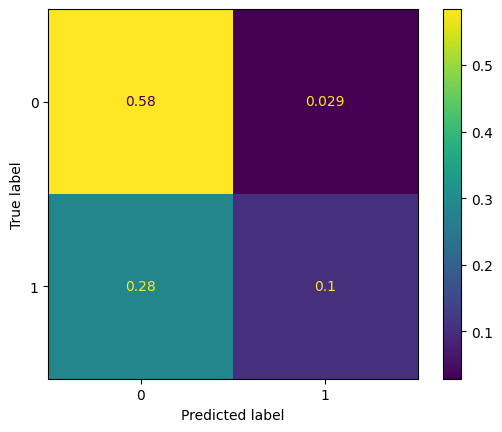

In [ ]:
logreg_2 = LogisticRegression(random_state=random_state)

logreg_2.fit(X2_final, y2_final)

y2_pred = logreg_2.predict(X_test2)

print(classification_report(y_test2, y2_pred, target_names=['Not approved', 'Approved']))

cm_2 = confusion_matrix(y_test2, y2_pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_2)
disp.plot()
plt.show()

RESULTS FOR ETHNICITY_WHITE


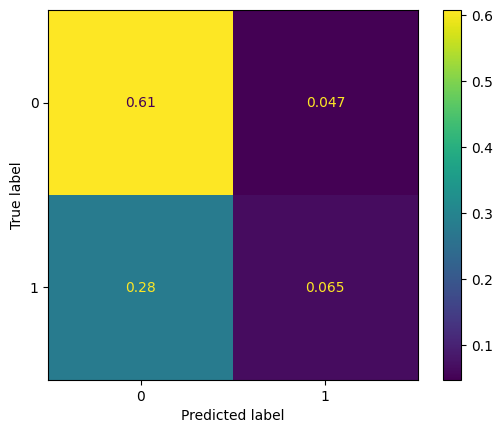

              precision    recall  f1-score   support

           0       0.68      0.93      0.79        70
           1       0.58      0.19      0.29        37

    accuracy                           0.67       107
   macro avg       0.63      0.56      0.54       107
weighted avg       0.65      0.67      0.61       107

RESULTS FOR ETHNICITY_OTHER


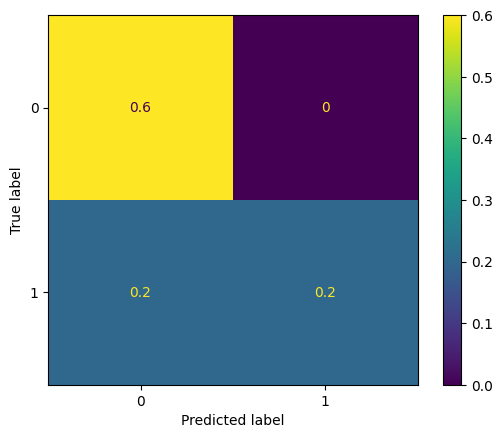

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5

RESULTS FOR ETHNICITY_LATINO


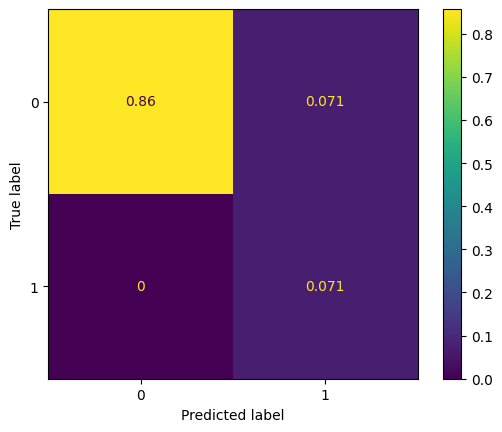

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.50      1.00      0.67         1

    accuracy                           0.93        14
   macro avg       0.75      0.96      0.81        14
weighted avg       0.96      0.93      0.94        14

RESULTS FOR ETHNICITY_BLACK


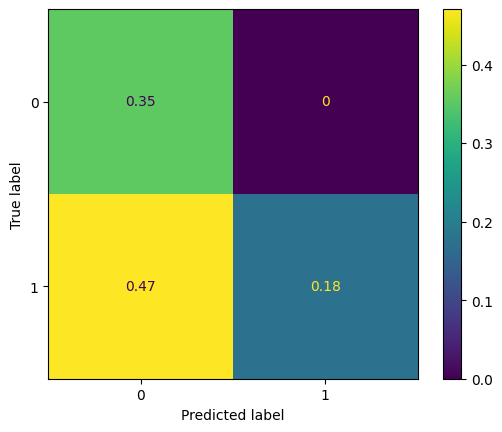

              precision    recall  f1-score   support

           0       0.43      1.00      0.60        12
           1       1.00      0.27      0.43        22

    accuracy                           0.53        34
   macro avg       0.71      0.64      0.51        34
weighted avg       0.80      0.53      0.49        34

RESULTS FOR ETHNICITY_ASIAN


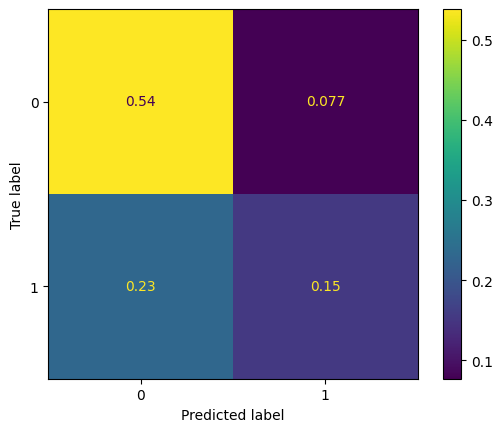

              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.67      0.40      0.50         5

    accuracy                           0.69        13
   macro avg       0.68      0.64      0.64        13
weighted avg       0.69      0.69      0.67        13



In [ ]:
dp_2, eoo_2 = protected_statistics(logreg_2, protected_attributes_2, pd.DataFrame(X_test2, columns=X_test2.columns), pd.DataFrame(y_test2), cm_2)

In [ ]:
for idx, et in enumerate(protected_attributes_2):
  print(f'{et.upper()}:\n\tDemographic parity {dp_2[idx]}\n\tEquality of opportunity: {eoo_2[idx]}') 

ETHNICITY_ASIAN:
	Demographic parity 0.0920409070698088
	Equality of opportunity: -0.05824811027123167
ETHNICITY_BLACK:
	Demographic parity 0.03774226453587215
	Equality of opportunity: 0.1815708942536552
ETHNICITY_LATINO:
	Demographic parity 0.00412881915772087
	Equality of opportunity: -0.28901734104046245
ETHNICITY_OTHER:
	Demographic parity 0.06127167630057803
	Equality of opportunity: -0.08901734104046244
ETHNICITY_WHITE:
	Demographic parity -0.02657879098914162
	Equality of opportunity: -0.00864350926476154


#### SVM

##### Dataset 1

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

Not approved       0.79      0.90      0.84       175
    Approved       0.66      0.44      0.53        75

    accuracy                           0.76       250
   macro avg       0.73      0.67      0.69       250
weighted avg       0.75      0.76      0.75       250



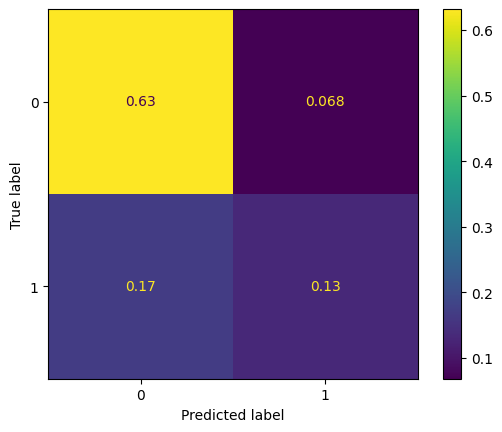

In [ ]:
# instantiate the model
svm_1 = SVC(random_state=random_state)

svm_1.fit(X1_final, y1_final)

y1_pred = logreg_1.predict(X_test1)

print(classification_report(y_test1, y1_pred, target_names=['Not approved', 'Approved']))

cm_1 = confusion_matrix(y_test1, y1_pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_1)
disp.plot()
plt.show()

RESULTS FOR FOREIGN_GERMAN


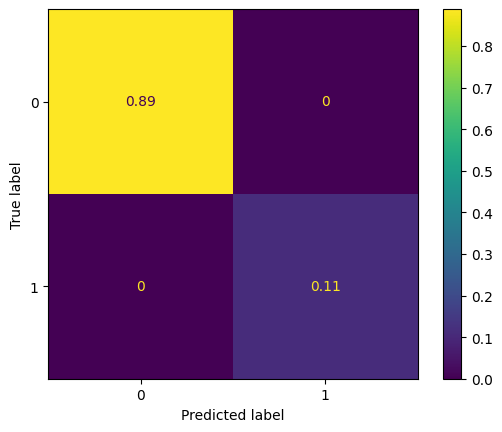

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         1

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

RESULTS FOR FOREIGN_FOREIGN


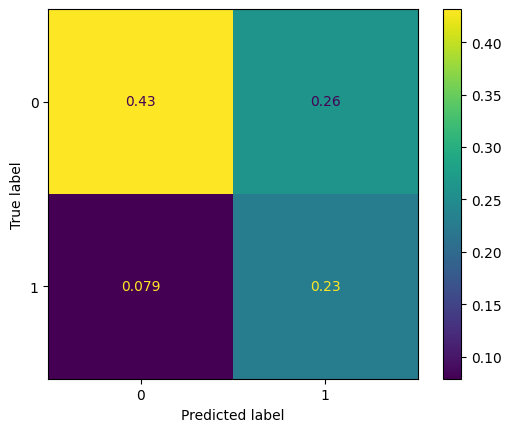

              precision    recall  f1-score   support

           0       0.85      0.62      0.72       167
           1       0.47      0.74      0.57        74

    accuracy                           0.66       241
   macro avg       0.66      0.68      0.65       241
weighted avg       0.73      0.66      0.67       241



In [ ]:
dp_1, eoo_1 = protected_statistics(svm_1, protected_attributes_1, pd.DataFrame(X_test1, columns=X_test1.columns), pd.DataFrame(y_test1), cm_1)

In [ ]:
for idx, et in enumerate(protected_attributes_1):
  print(f'{et.upper()}:\n\tDemographic parity {dp_1[idx]}\n\tEquality of opportunity: {eoo_1[idx]}') 

FOREIGN_FOREIGN:
	Demographic parity 0.28962655601659754
	Equality of opportunity: -0.08916182572614109
FOREIGN_GERMAN:
	Demographic parity -0.0888888888888889
	Equality of opportunity: -0.168


##### Dataset 2

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

Not approved       0.67      0.95      0.79       106
    Approved       0.78      0.27      0.40        67

    accuracy                           0.69       173
   macro avg       0.73      0.61      0.59       173
weighted avg       0.72      0.69      0.64       173



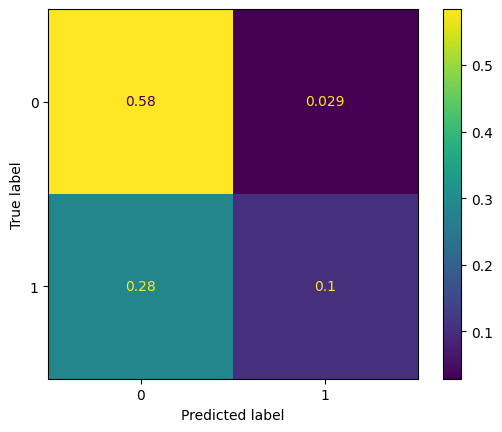

In [ ]:
svm_2 = LogisticRegression(random_state=random_state)

svm_2.fit(X2_final, y2_final)

y2_pred = logreg_2.predict(X_test2)

print(classification_report(y_test2, y2_pred, target_names=['Not approved', 'Approved']))

cm_2 = confusion_matrix(y_test2, y2_pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_2)
disp.plot()
plt.show()

RESULTS FOR ETHNICITY_WHITE


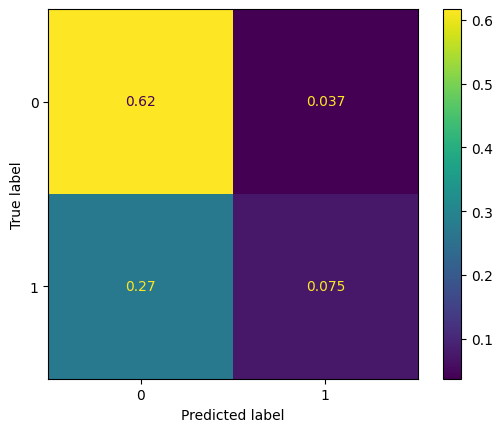

              precision    recall  f1-score   support

           0       0.69      0.94      0.80        70
           1       0.67      0.22      0.33        37

    accuracy                           0.69       107
   macro avg       0.68      0.58      0.56       107
weighted avg       0.69      0.69      0.64       107

RESULTS FOR ETHNICITY_OTHER


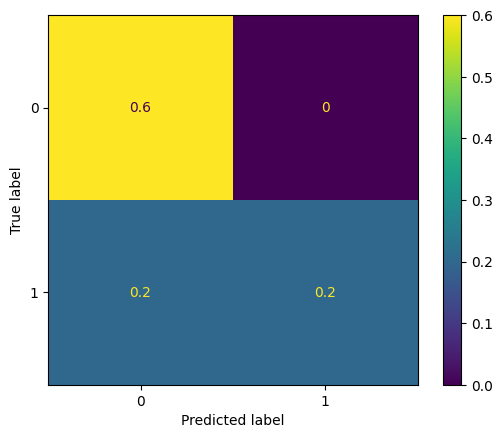

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5

RESULTS FOR ETHNICITY_LATINO


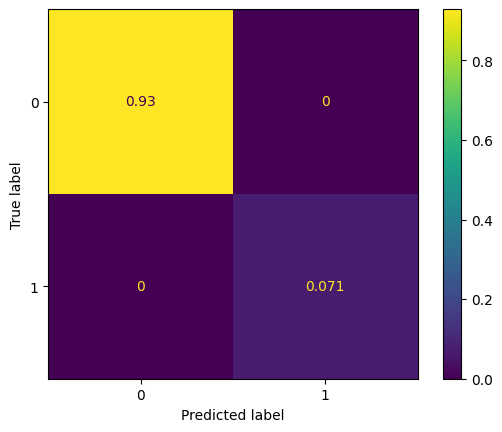

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         1

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

RESULTS FOR ETHNICITY_BLACK


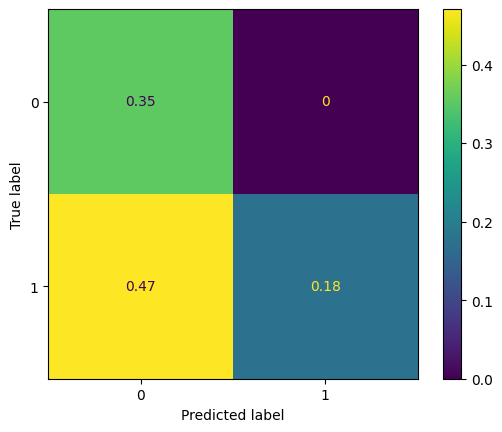

              precision    recall  f1-score   support

           0       0.43      1.00      0.60        12
           1       1.00      0.27      0.43        22

    accuracy                           0.53        34
   macro avg       0.71      0.64      0.51        34
weighted avg       0.80      0.53      0.49        34

RESULTS FOR ETHNICITY_ASIAN


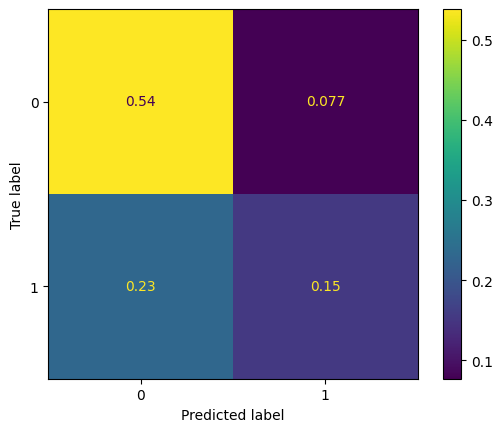

              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.67      0.40      0.50         5

    accuracy                           0.69        13
   macro avg       0.68      0.64      0.64        13
weighted avg       0.69      0.69      0.67        13



In [ ]:
dp_2, eoo_2 = protected_statistics(svm_2, protected_attributes_2, pd.DataFrame(X_test2, columns=X_test2.columns), pd.DataFrame(y_test2), cm_2)

In [ ]:
for idx, et in enumerate(protected_attributes_2):
  print(f'{et.upper()}:\n\tDemographic parity {dp_2[idx]}\n\tEquality of opportunity: {eoo_2[idx]}') 

ETHNICITY_ASIAN:
	Demographic parity 0.09782125389061808
	Equality of opportunity: -0.05246776345042242
ETHNICITY_BLACK:
	Demographic parity 0.04352261135668142
	Equality of opportunity: 0.18735124107446444
ETHNICITY_LATINO:
	Demographic parity -0.06151940545004128
	Equality of opportunity: -0.2832369942196532
ETHNICITY_OTHER:
	Demographic parity 0.0670520231213873
	Equality of opportunity: -0.0832369942196532
ETHNICITY_WHITE:
	Demographic parity -0.020798444168332347
	Equality of opportunity: -0.01220895683647566
